In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data set
data = pd.read_csv('train.csv')
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
# Exploring the data
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [6]:
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
## Data Preparation

In [8]:
# List of variables to Remove as they does not help in anyway in this analysis such as Id
# Also remvoing variables where missing value percentage is >80%

varlist =  ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']
#'FireplaceQu'
# Droping varlist elements 
for element in varlist:

    data.drop(element, inplace=True, axis=1)



In [9]:
round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=True)

MSSubClass        0.00
TotalBsmtSF       0.00
SaleCondition     0.00
HeatingQC         0.00
CentralAir        0.00
                 ...  
GarageYrBlt       5.55
GarageType        5.55
GarageCond        5.55
LotFrontage      17.74
FireplaceQu      47.26
Length: 76, dtype: float64

In [10]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [11]:
# Find out categorical and numerical columns and impute them with mode and median

catg_cols = list(data.select_dtypes(exclude=np.number).columns)
numeric_cols = list(data.select_dtypes(include=np.number).columns)
for cat in catg_cols:
    print(data[cat].value_counts())
    


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [12]:
for num in numeric_cols:
    print(data[num])

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64
0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64
0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64
0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64
0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459 

In [13]:
#Impute Null Categorical variables with Mode(If any) and impute continous variable with median
varlist_to_impute =  ['LotFrontage','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrArea','MasVnrType','Electrical']
for catelement in varlist_to_impute:
    if catelement in catg_cols:
        data[catelement]=data[catelement].fillna(data[catelement].mode()[0])
        #print(round(data[catelement].isnull().sum()/len(data.index)*100,2))
        #print(catelement)
for catelement in varlist_to_impute:
    if catelement in numeric_cols:
        data[catelement]=data[catelement].fillna(data[catelement].median())
        #print(round(data[catelement].isnull().sum()/len(data[catelement].index)*100,2))

In [14]:

round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=True)

MSSubClass       0.00
Functional       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
                ...  
Exterior1st      0.00
RoofMatl         0.00
RoofStyle        0.00
ExterCond        0.00
FireplaceQu     47.26
Length: 76, dtype: float64

In [15]:
# Converting OverallQual, OverallCond and MSSubClass variable to categorical string variable.  
data.OverallQual.replace({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"},inplace = True)

data.OverallCond.replace({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"},inplace = True)

data.MSSubClass.replace({20:"1-STORY 1946 & NEWER ALL STYLES",
        30:"1-STORY 1945 & OLDER",
        40:"1-STORY W/FINISHED ATTIC ALL AGES",
        45:"1-1/2 STORY - UNFINISHED ALL AGES",
        50:"1-1/2 STORY FINISHED ALL AGES",
        60:"2-STORY 1946 & NEWER",
        70:"2-STORY 1945 & OLDER",
        75:"2-1/2 STORY ALL AGES",
        80:"SPLIT OR MULTI-LEVEL",
        85:"SPLIT FOYER",
        90:"DUPLEX - ALL STYLES AND AGES",
       120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       150:"1-1/2 STORY PUD - ALL AGES",
       160:"2-STORY PUD - 1946 & NEWER",
       180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"}, inplace=True)

# Convert MoSold and year to YrSold variable
month ={}
for x in range(1,13):
    month[x]=calendar.month_name[x]
data.MoSold.replace(month,inplace=True)
data["GarageAge"]=data["YrSold"]-data["GarageYrBlt"]
del data["GarageYrBlt"]
numeric_cols.remove('GarageYrBlt')
numeric_cols.append('GarageAge')
#data["YrSold"]=data["YrSold"].astype(str)
data["HouseAge"]=data["YrSold"]-data["YearBuilt"]
del data["YearBuilt"]
numeric_cols.remove('YearBuilt')
numeric_cols.append('HouseAge')
data["HouseRemodAge"]=data["YrSold"]-data["YearRemodAdd"]
del data["YearRemodAdd"]
numeric_cols.remove('YearRemodAdd')
numeric_cols.append('HouseRemodAge')
del data["YrSold"]
numeric_cols.remove('YrSold')


In [16]:
# Removing converted categrogical variables fron numeric list and adding it to categorical list for analysis
list1 = ['OverallQual','OverallCond','MSSubClass','MoSold']
numeric_cols=[ele for ele in numeric_cols if ele not  in list1]
if 'MSSubClass' in numeric_cols:
    print("true")
catg_cols.extend(list1)

data[catg_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

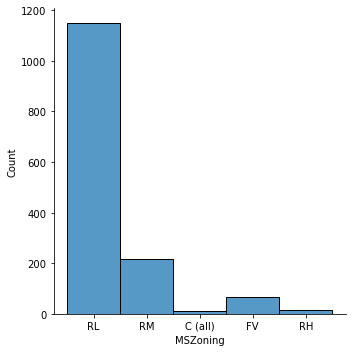

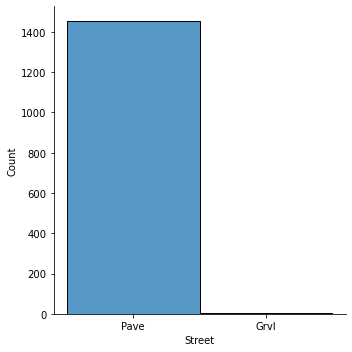

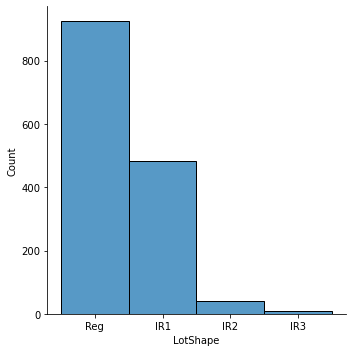

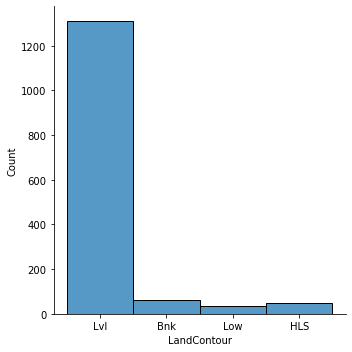

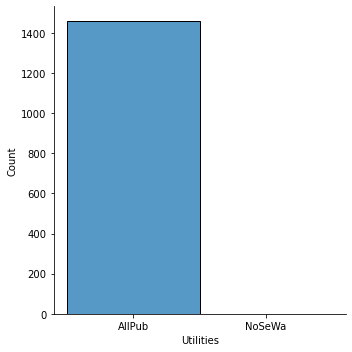

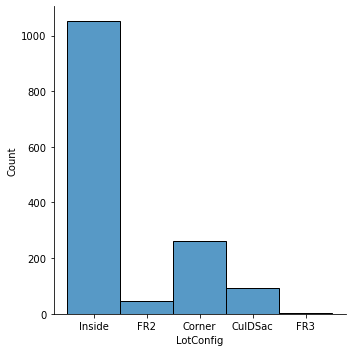

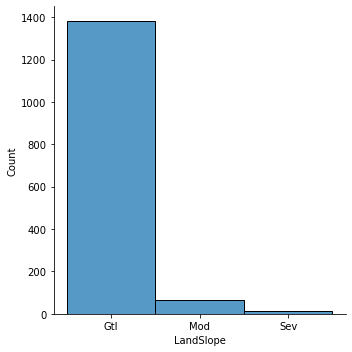

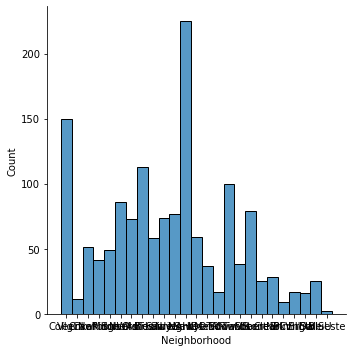

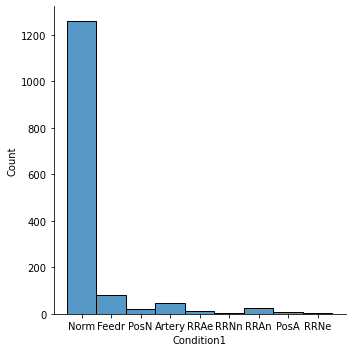

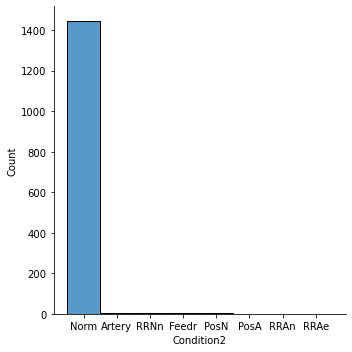

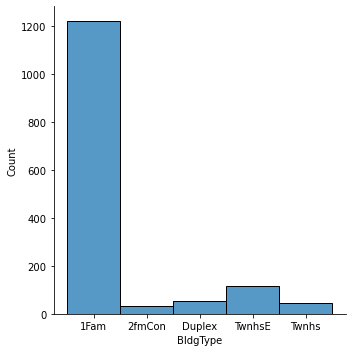

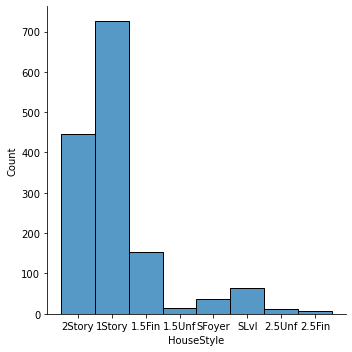

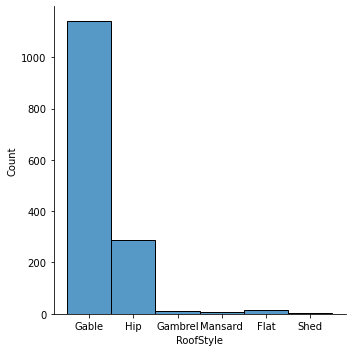

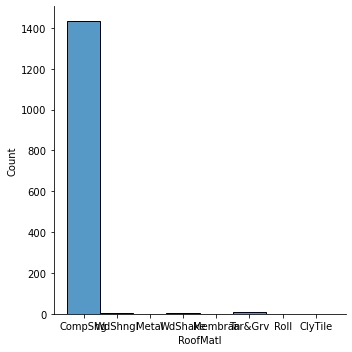

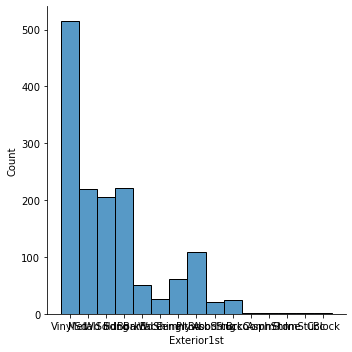

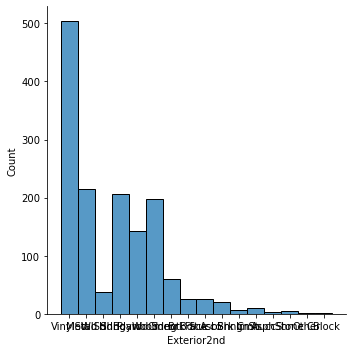

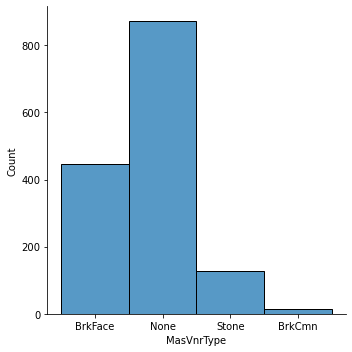

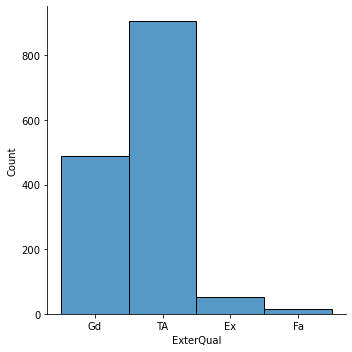

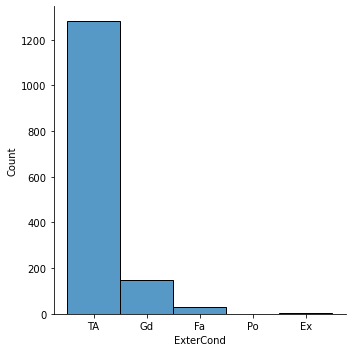

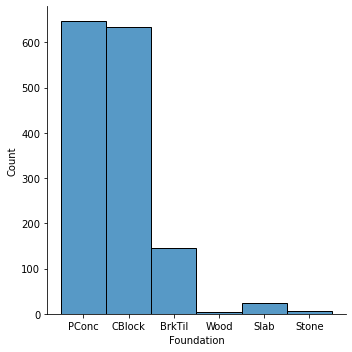

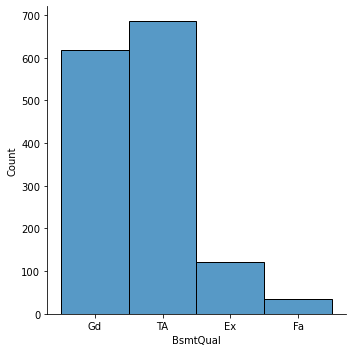

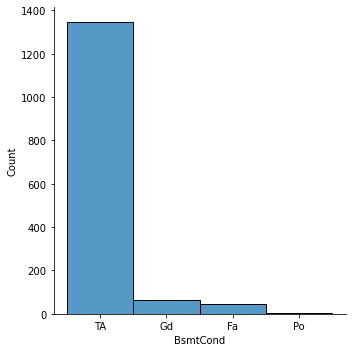

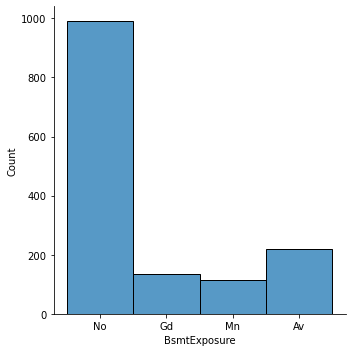

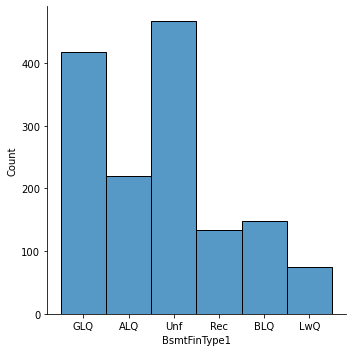

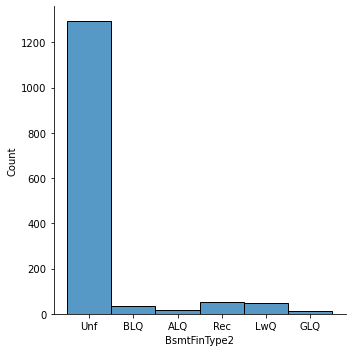

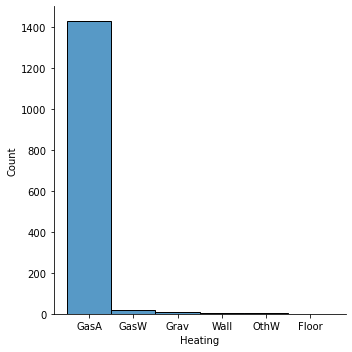

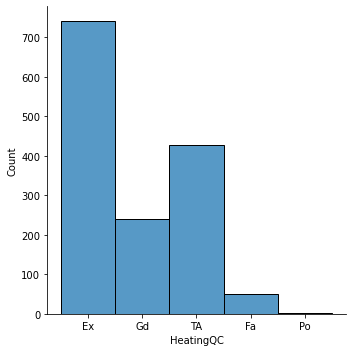

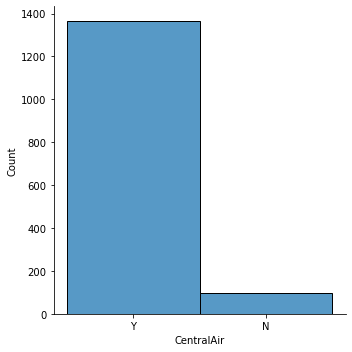

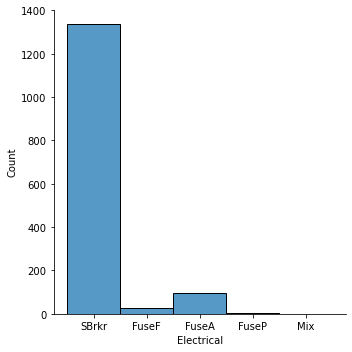

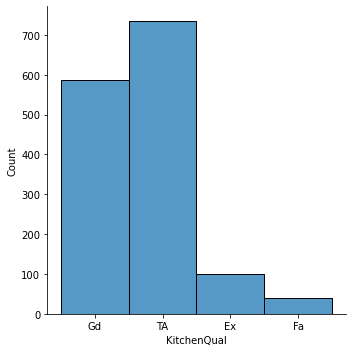

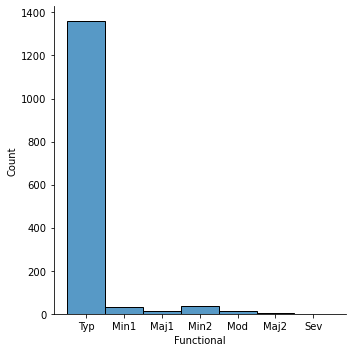

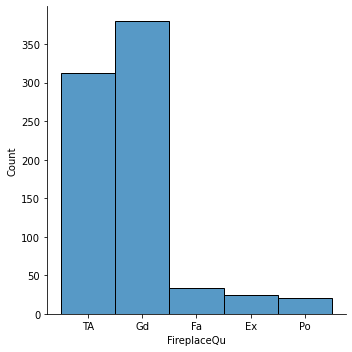

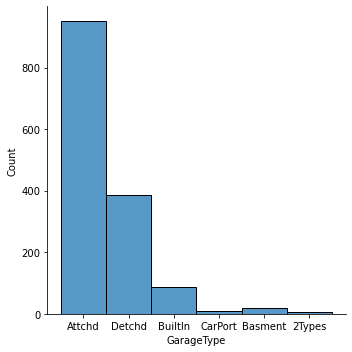

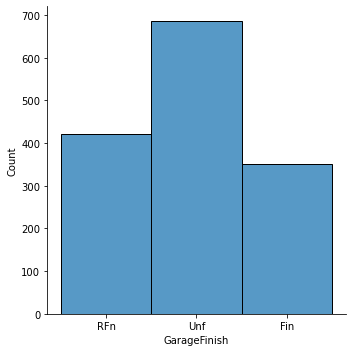

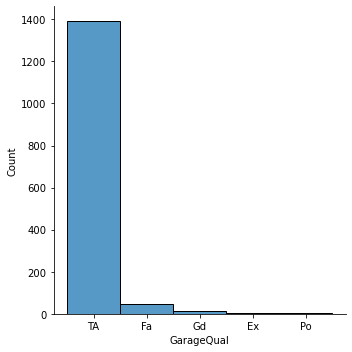

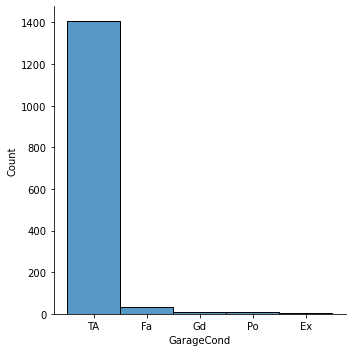

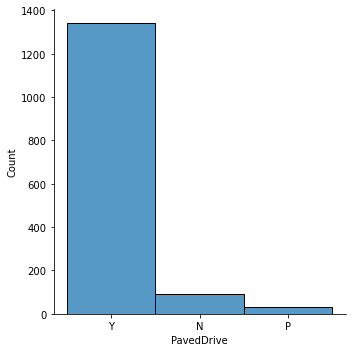

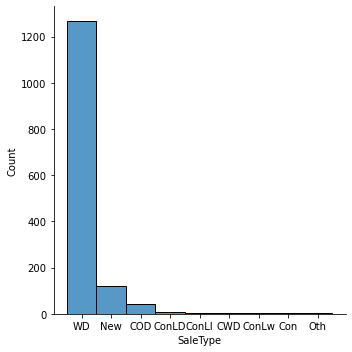

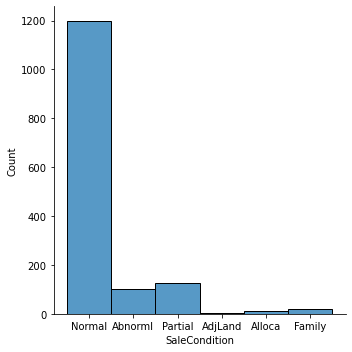

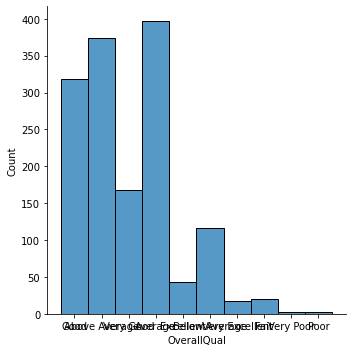

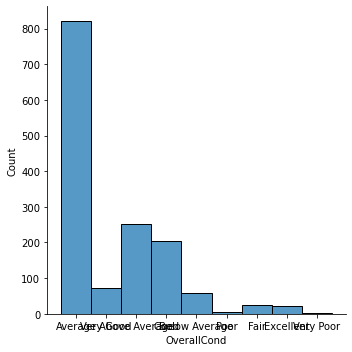

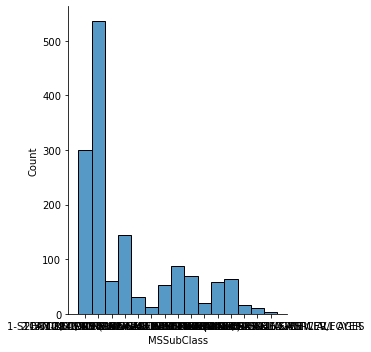

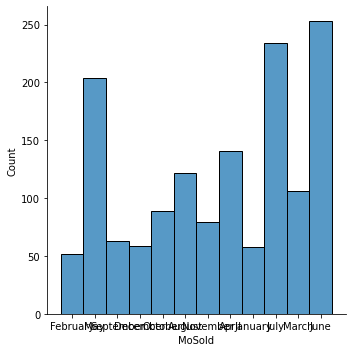

In [17]:

for element in catg_cols:
    sns.displot(data, x=element)
    plt.show()
    

In [18]:
# Removing variables by looking at distributions 
var_removed=['Street','Utilities','Condition2','RoofMatl','Heating']

for element in var_removed:
    print (element)    
    catg_cols.remove(element)
    del data[element]
        


Street
Utilities
Condition2
RoofMatl
Heating


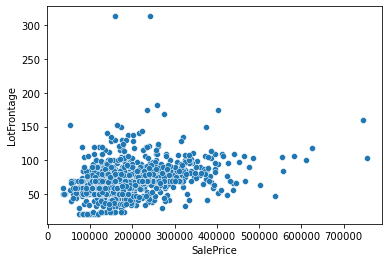

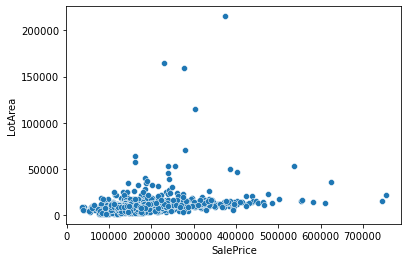

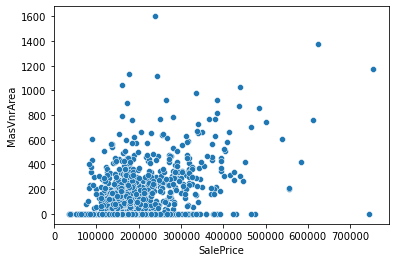

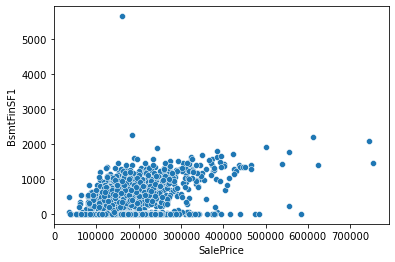

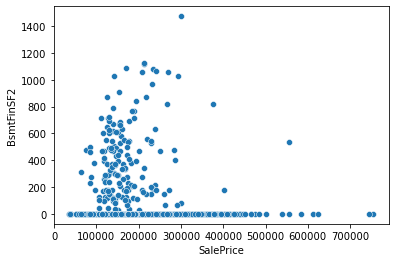

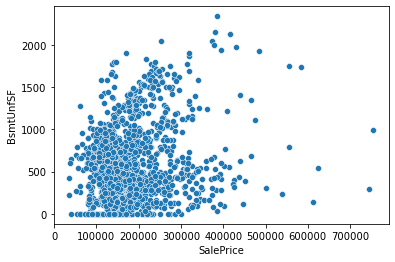

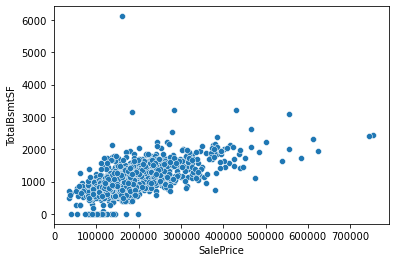

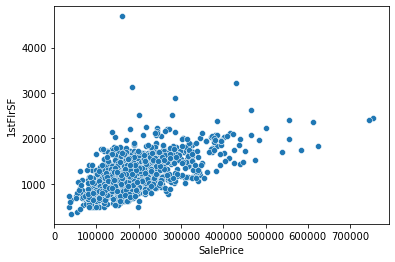

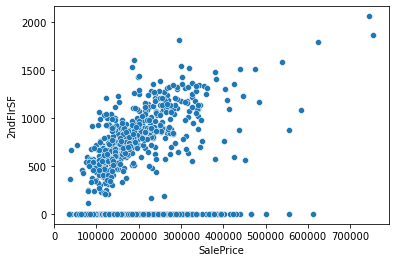

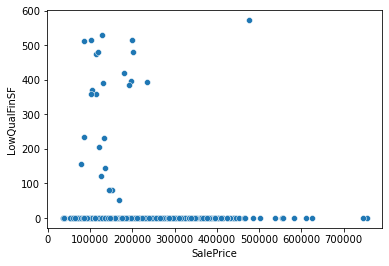

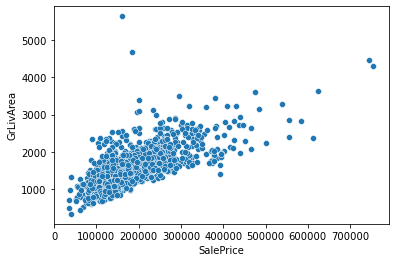

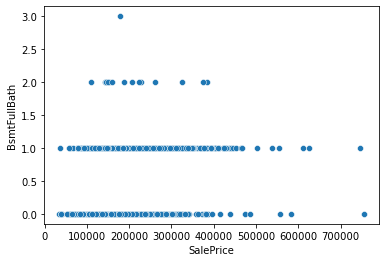

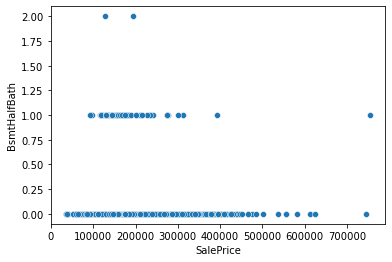

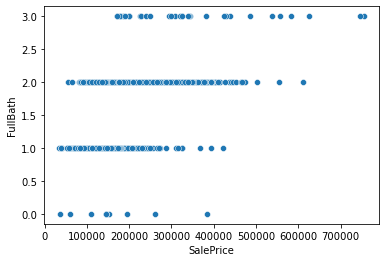

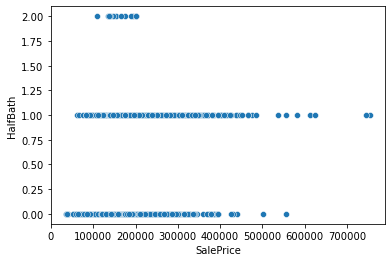

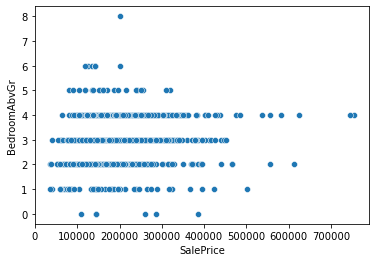

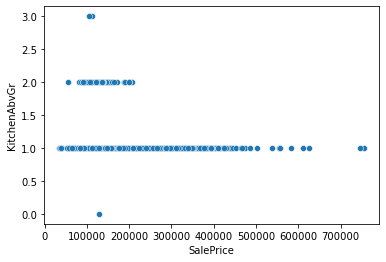

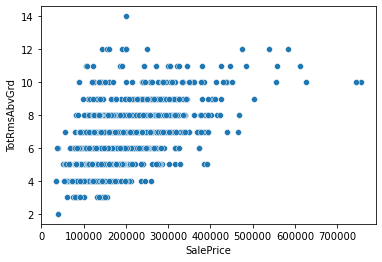

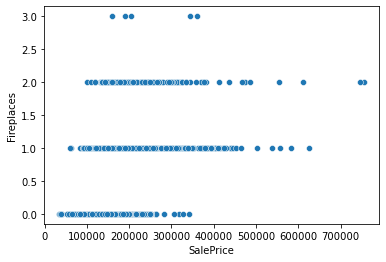

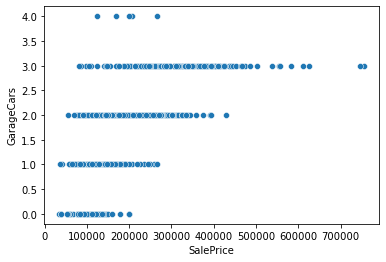

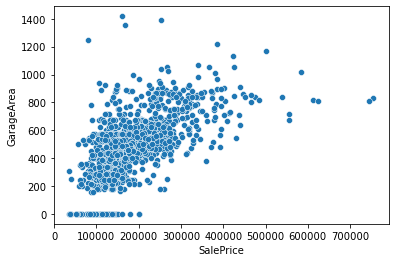

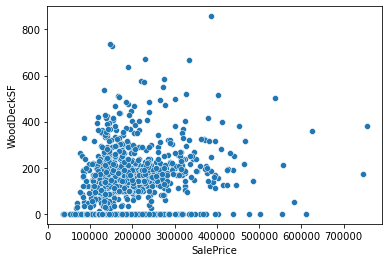

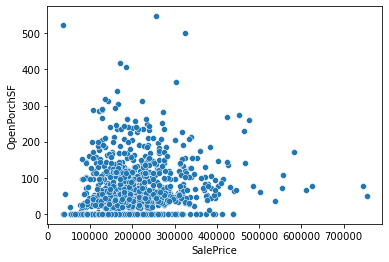

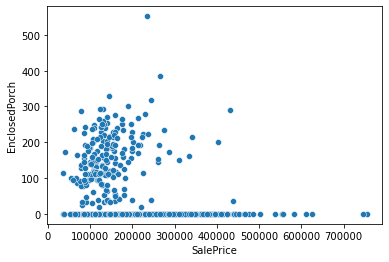

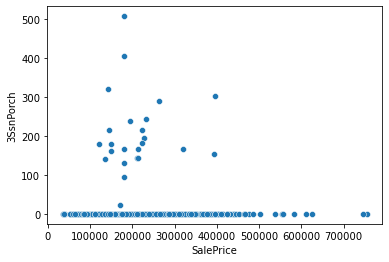

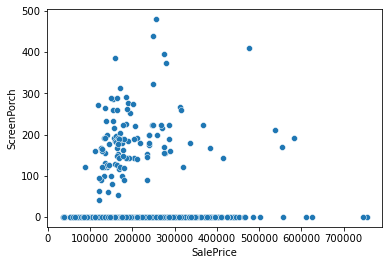

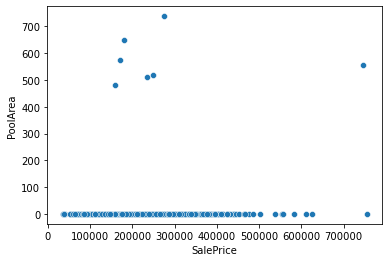

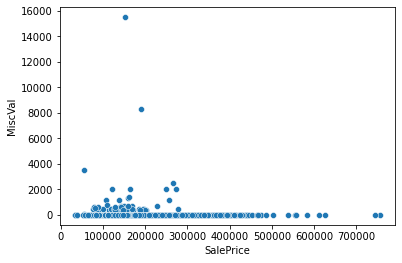

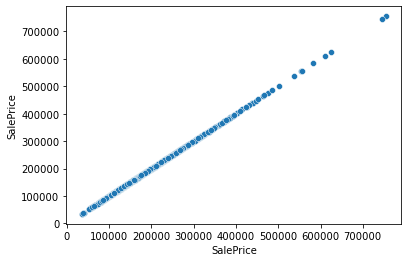

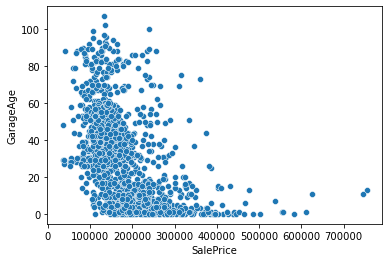

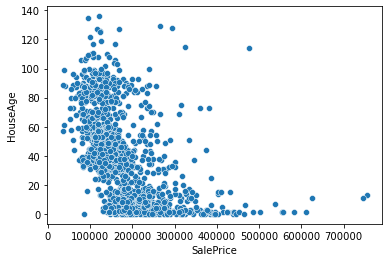

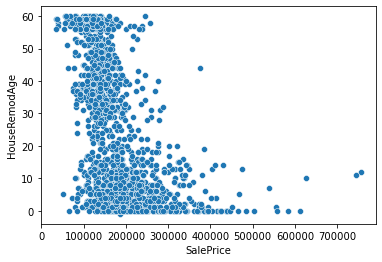

In [19]:
# Plotting a scatter plot
for element in numeric_cols:
    sns.scatterplot( data = data , x ='SalePrice' , y=element)
    plt.show()

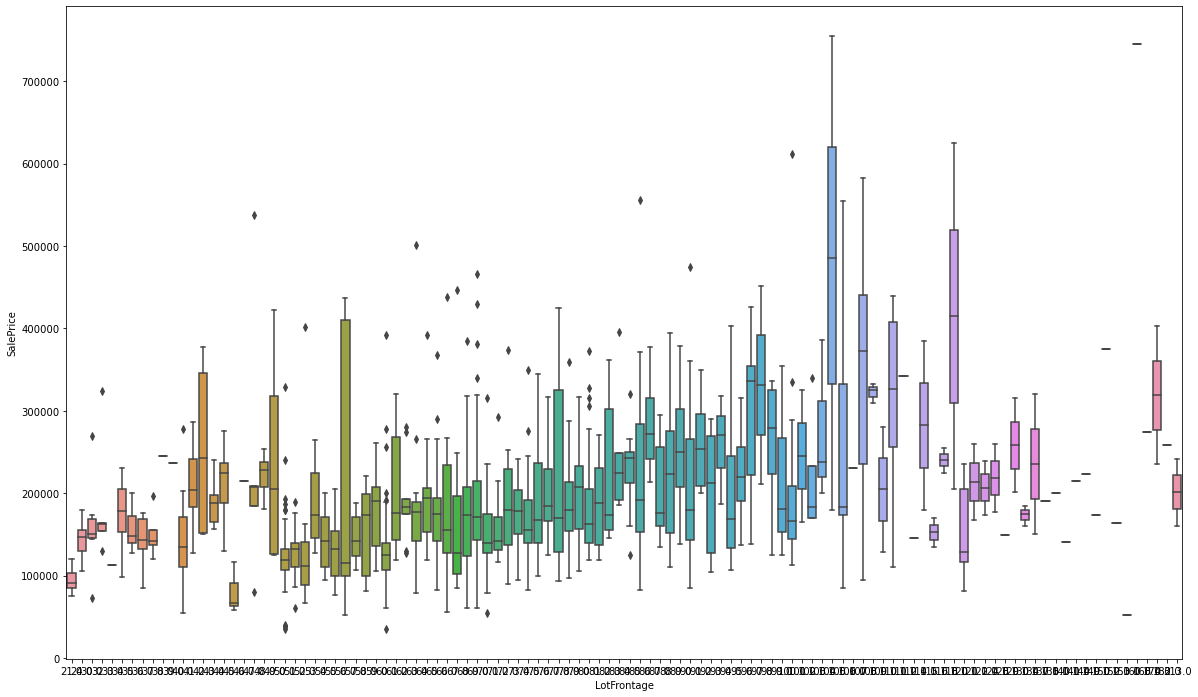

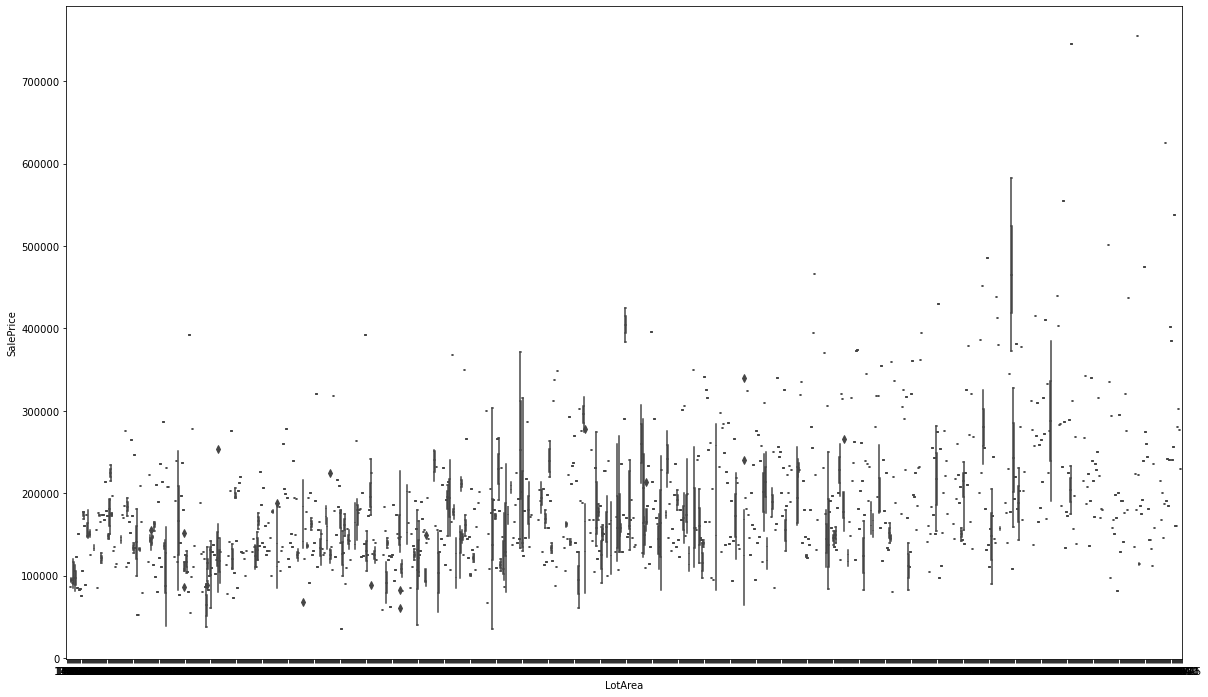

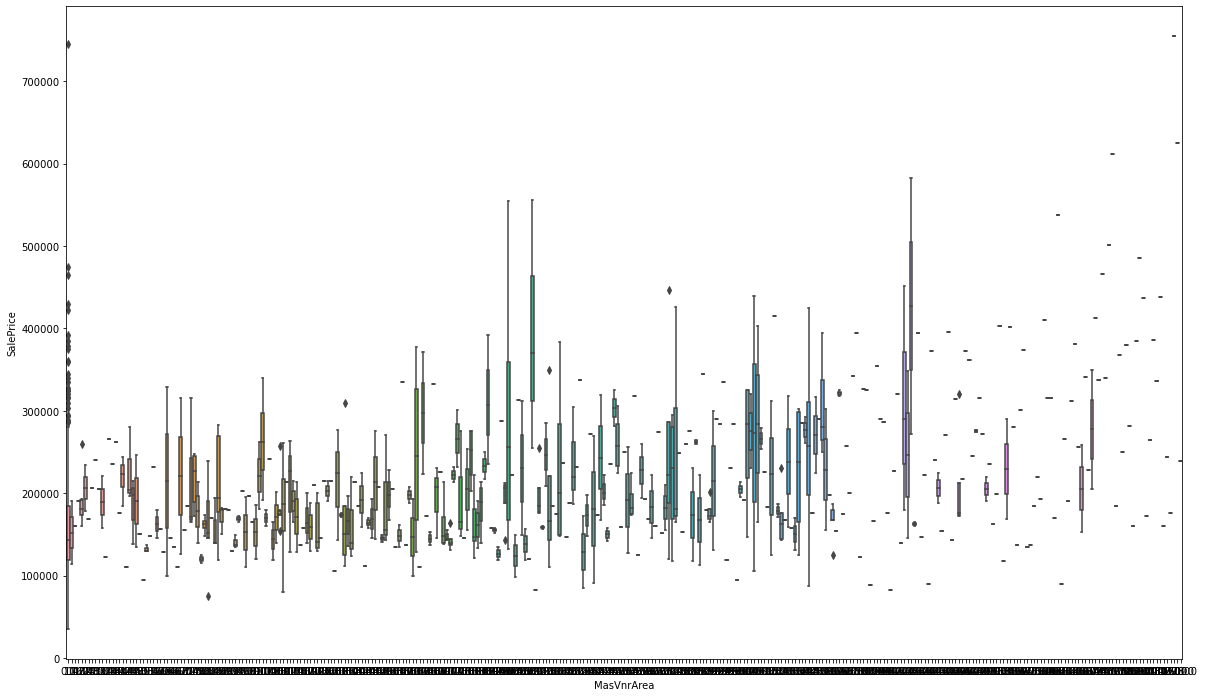

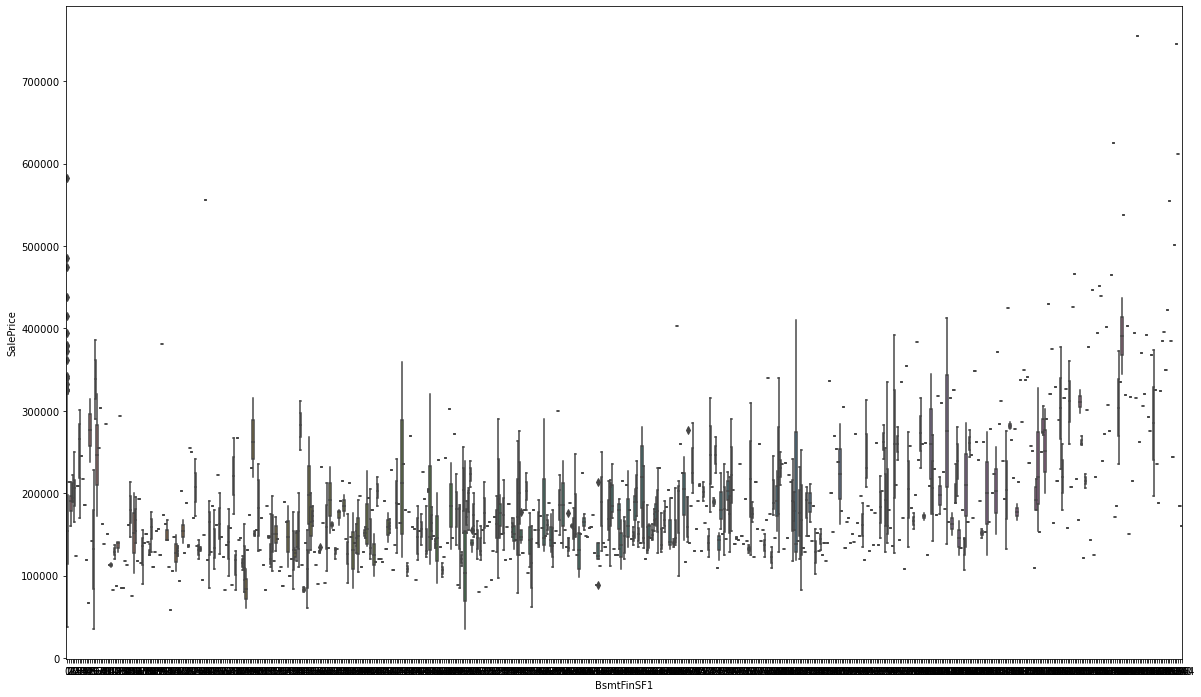

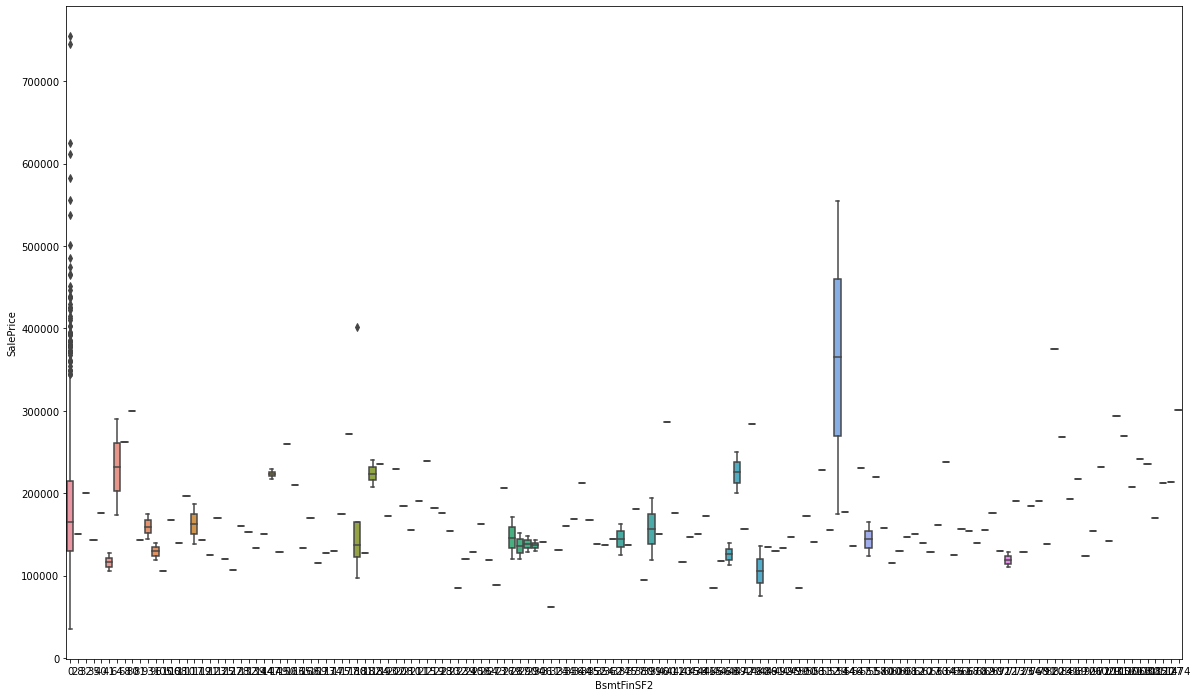

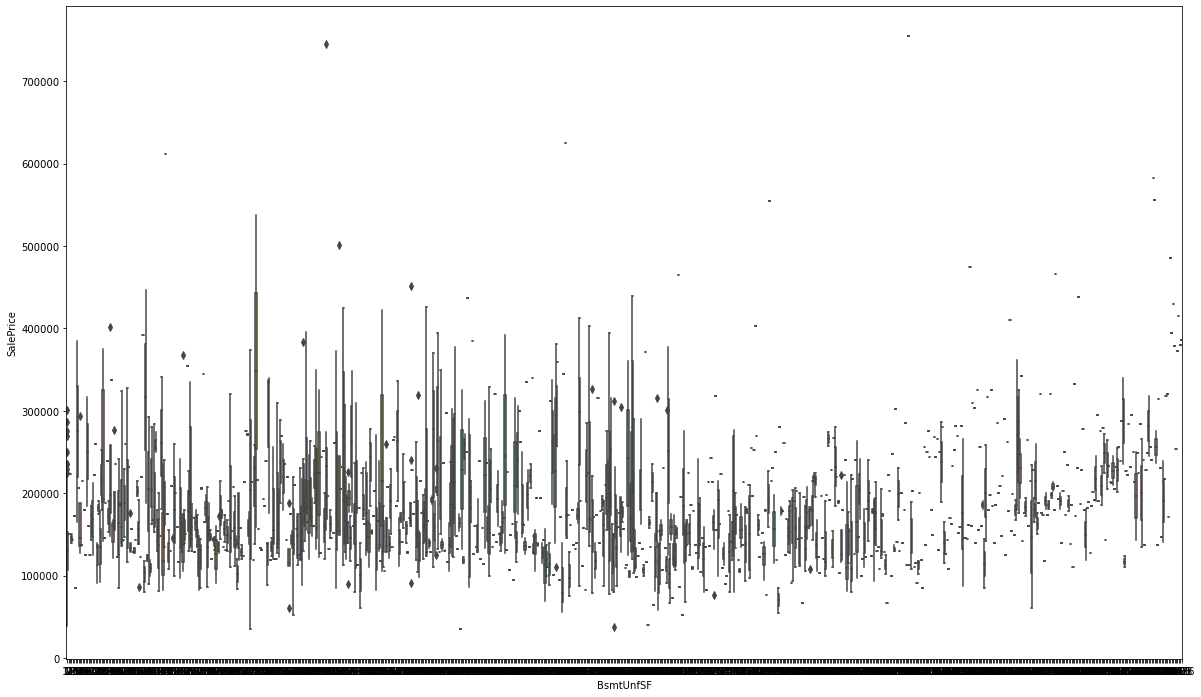

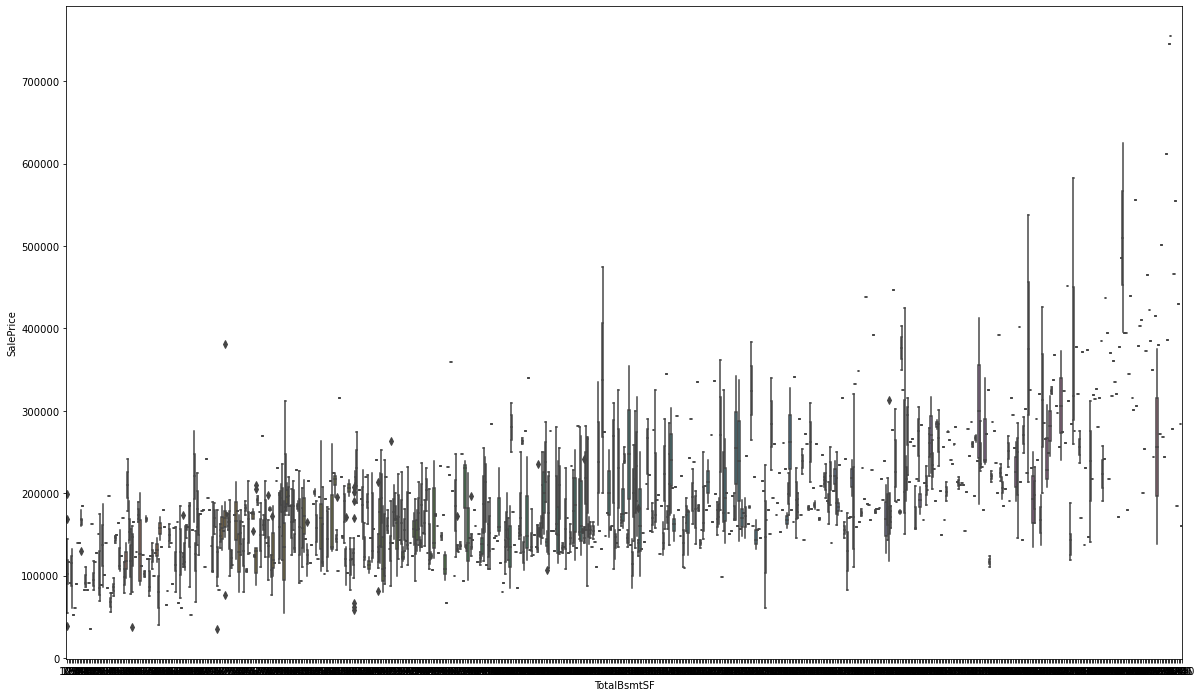

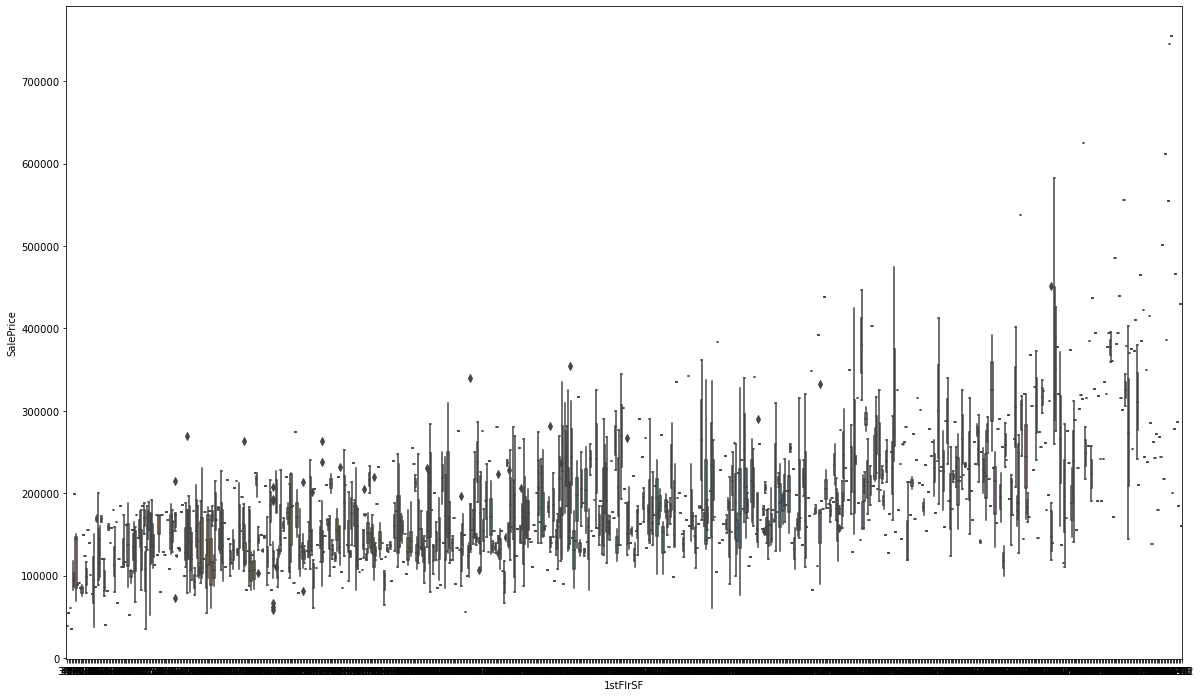

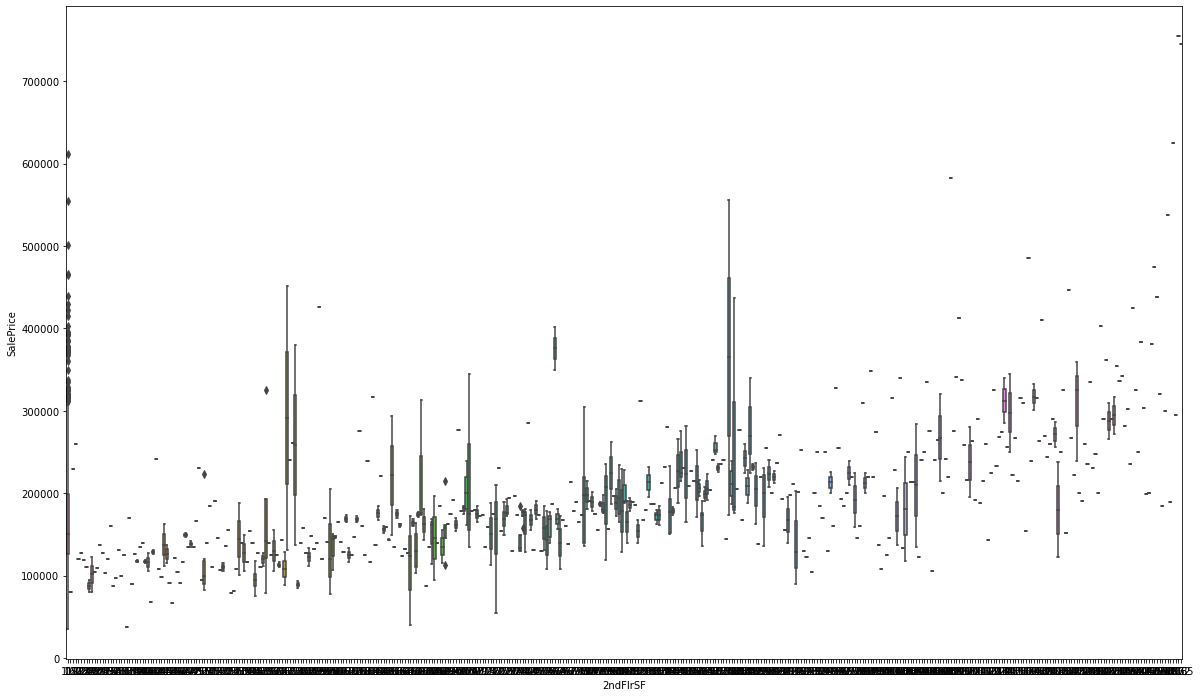

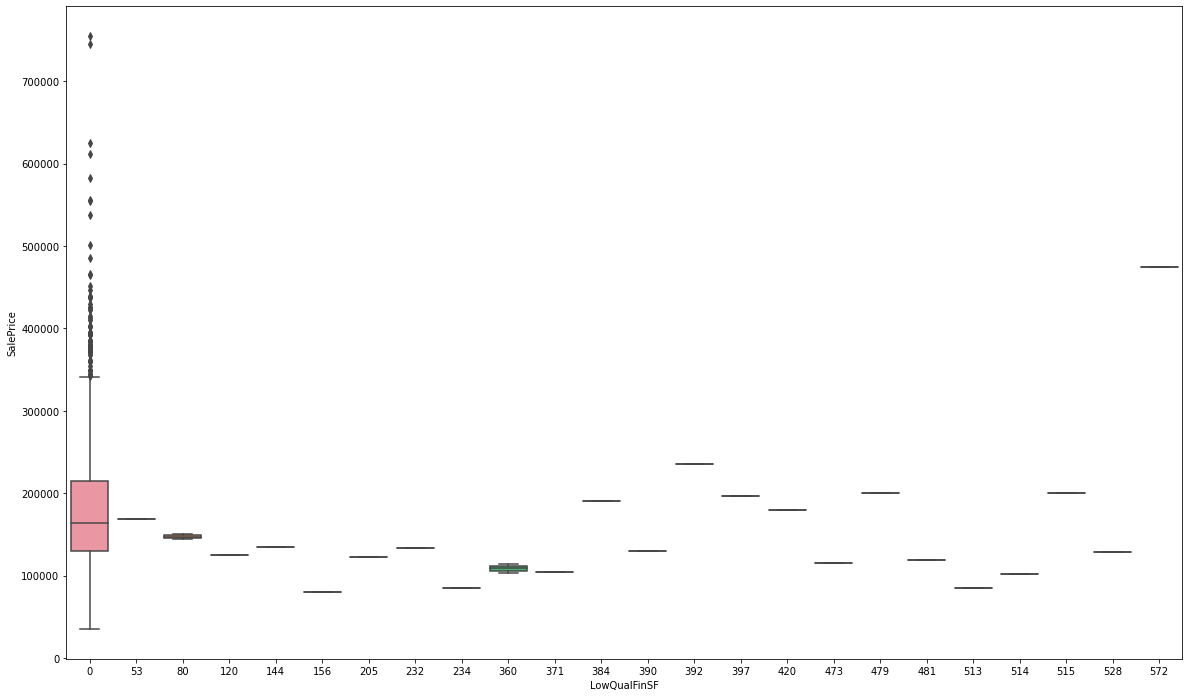

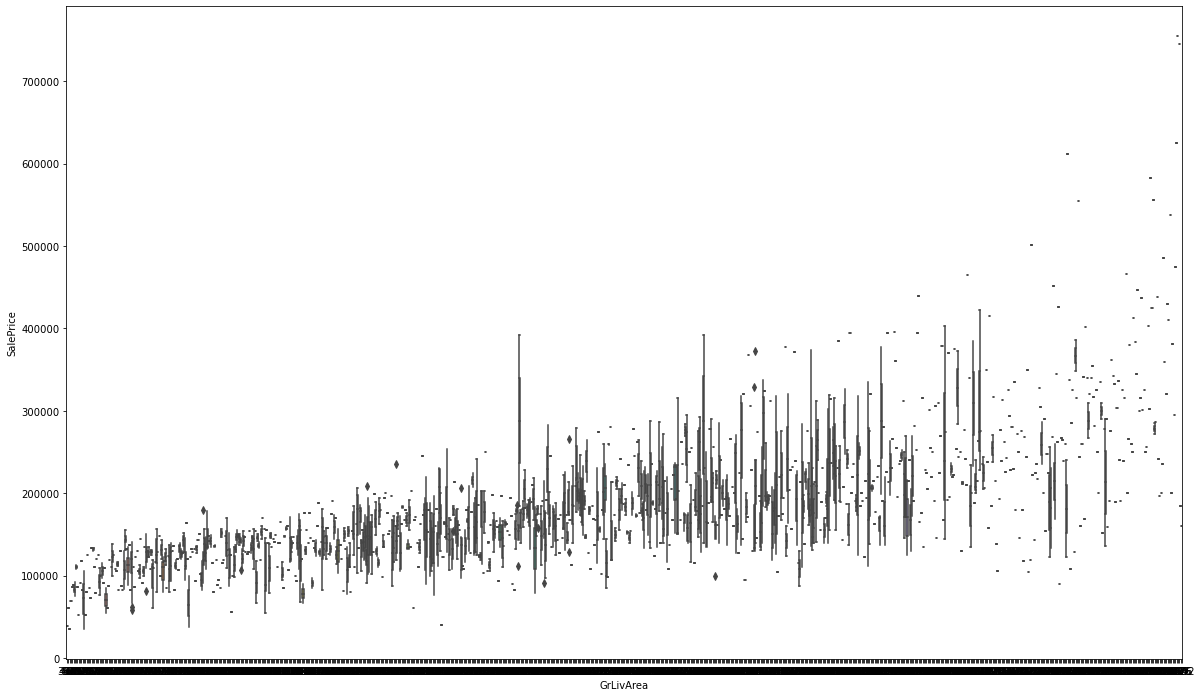

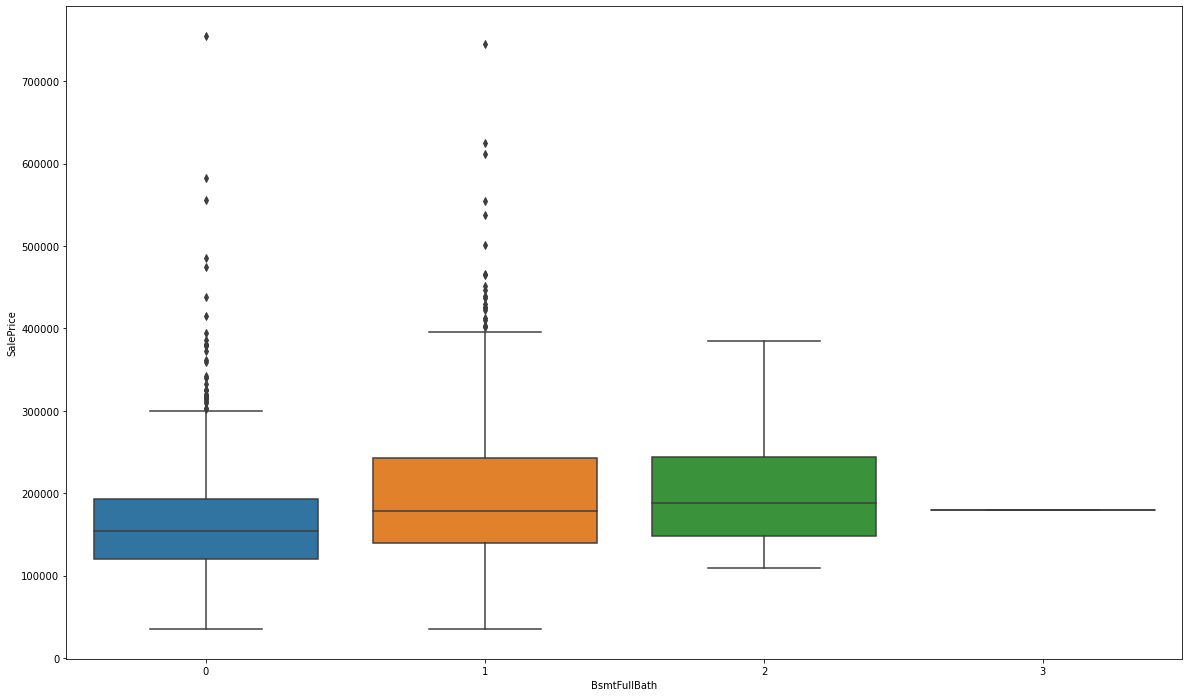

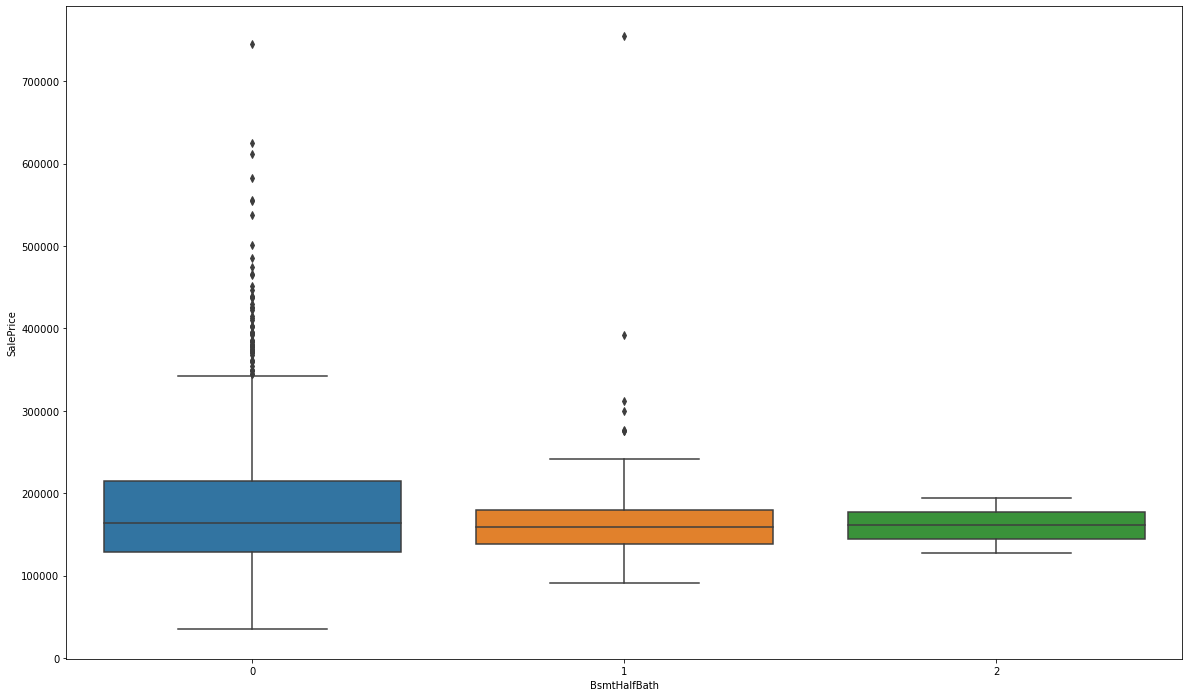

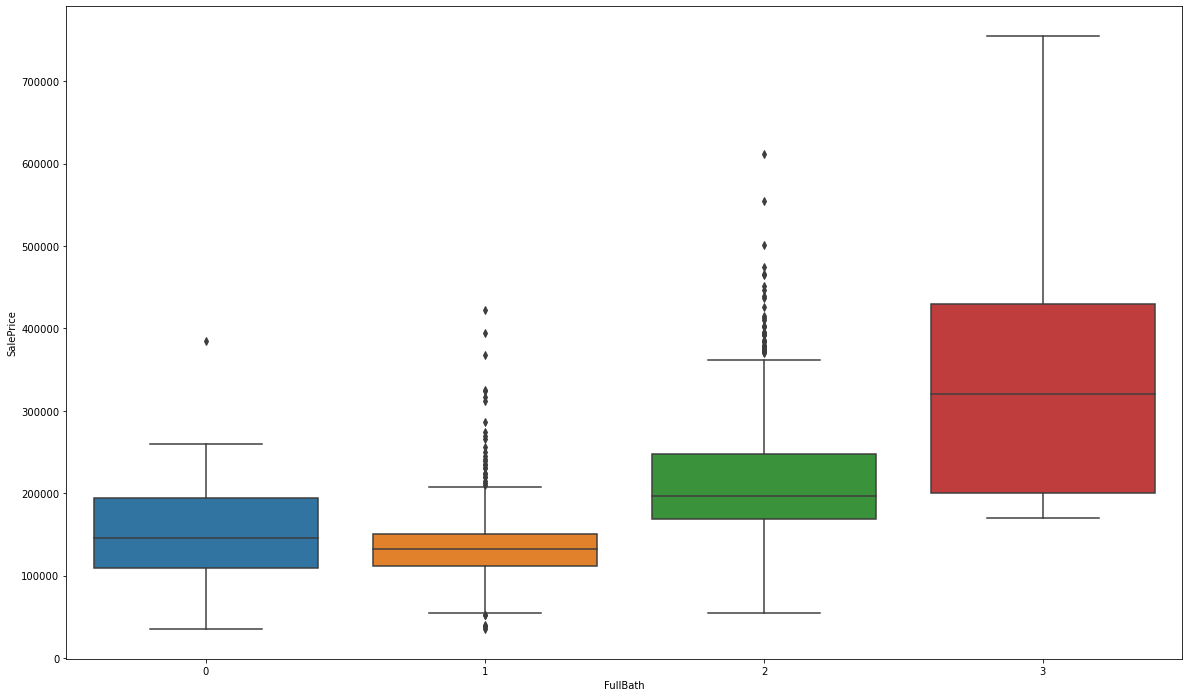

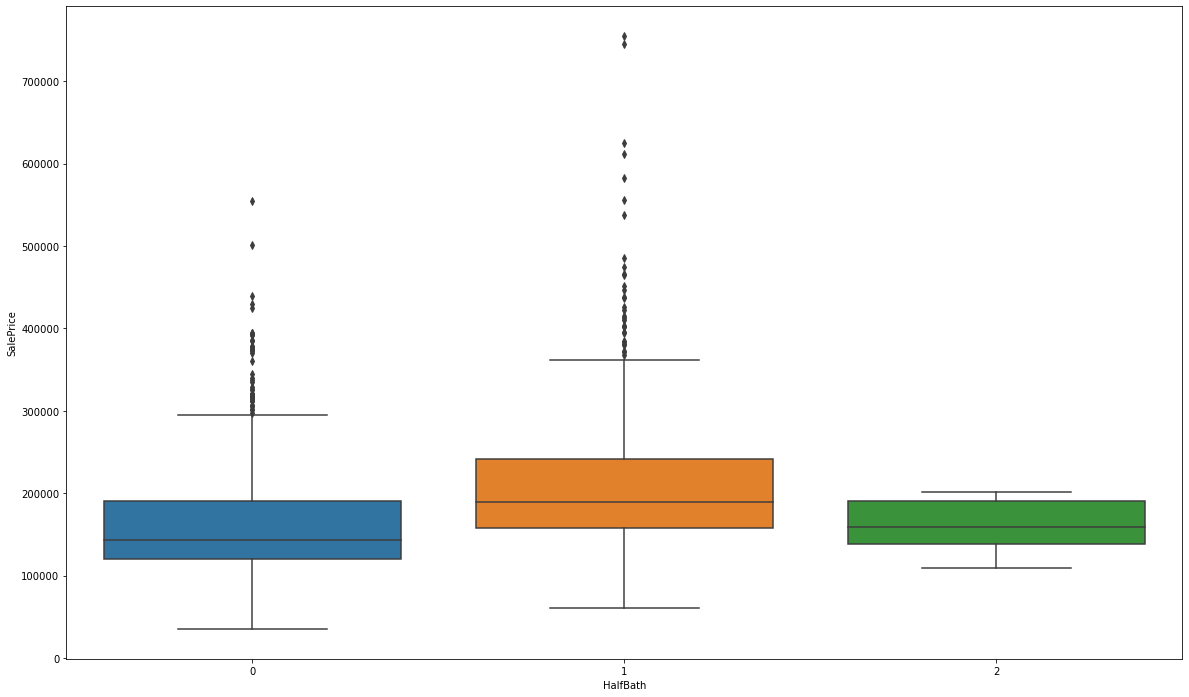

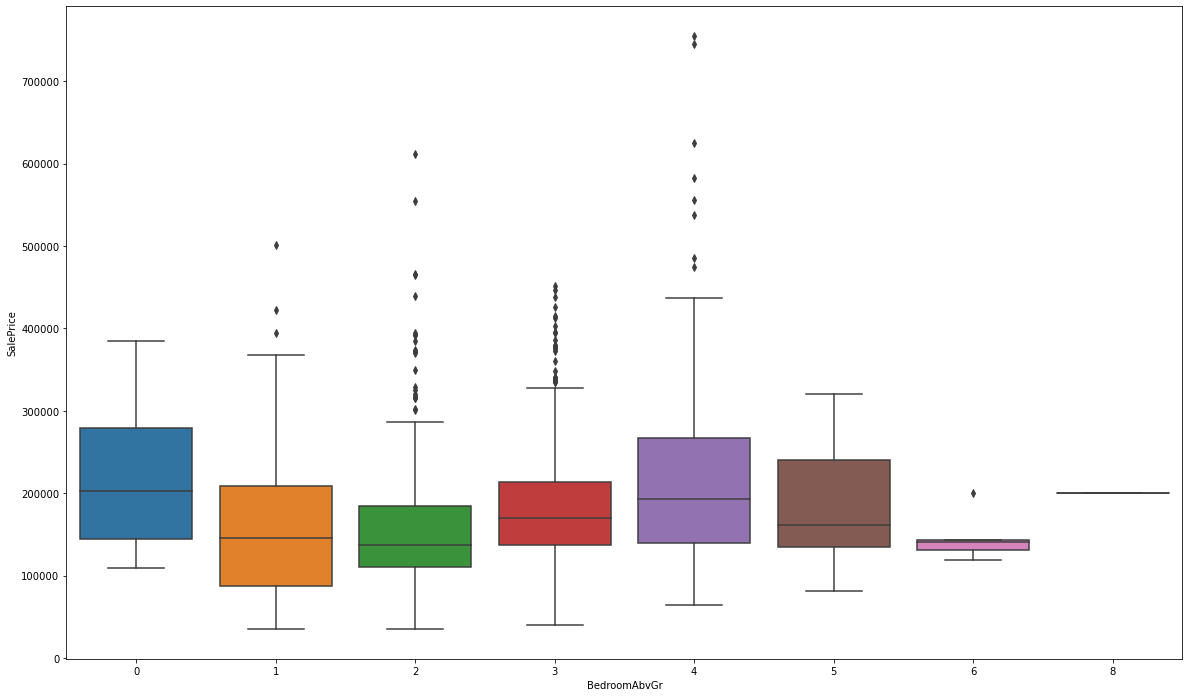

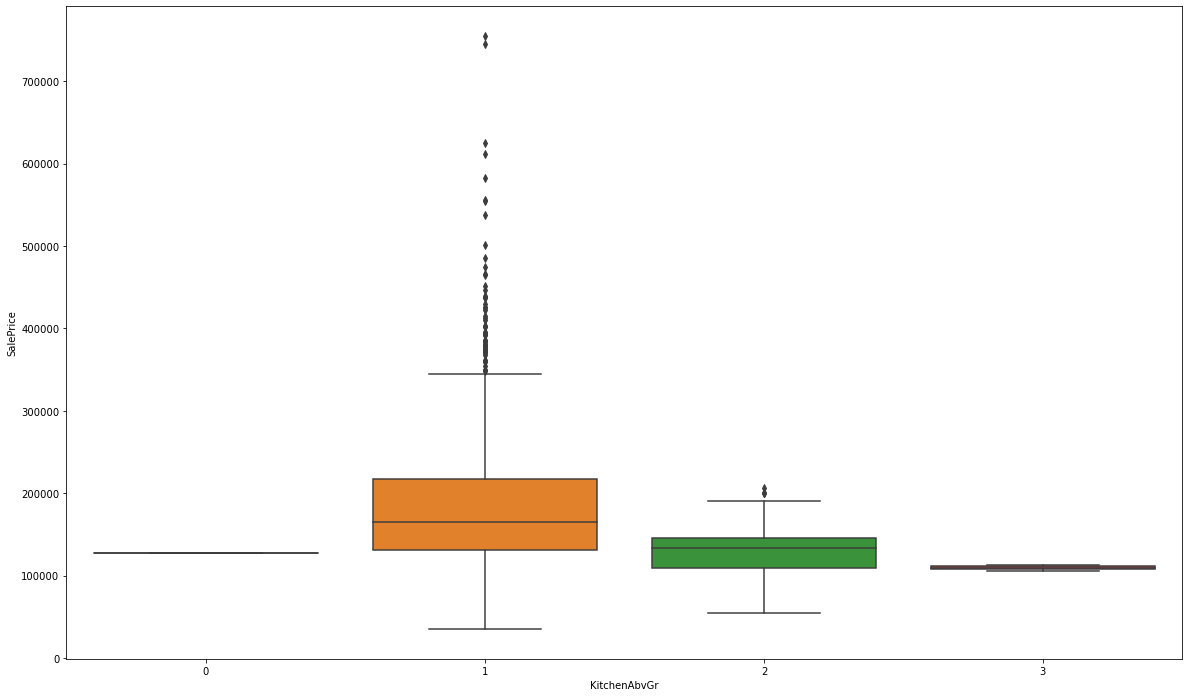

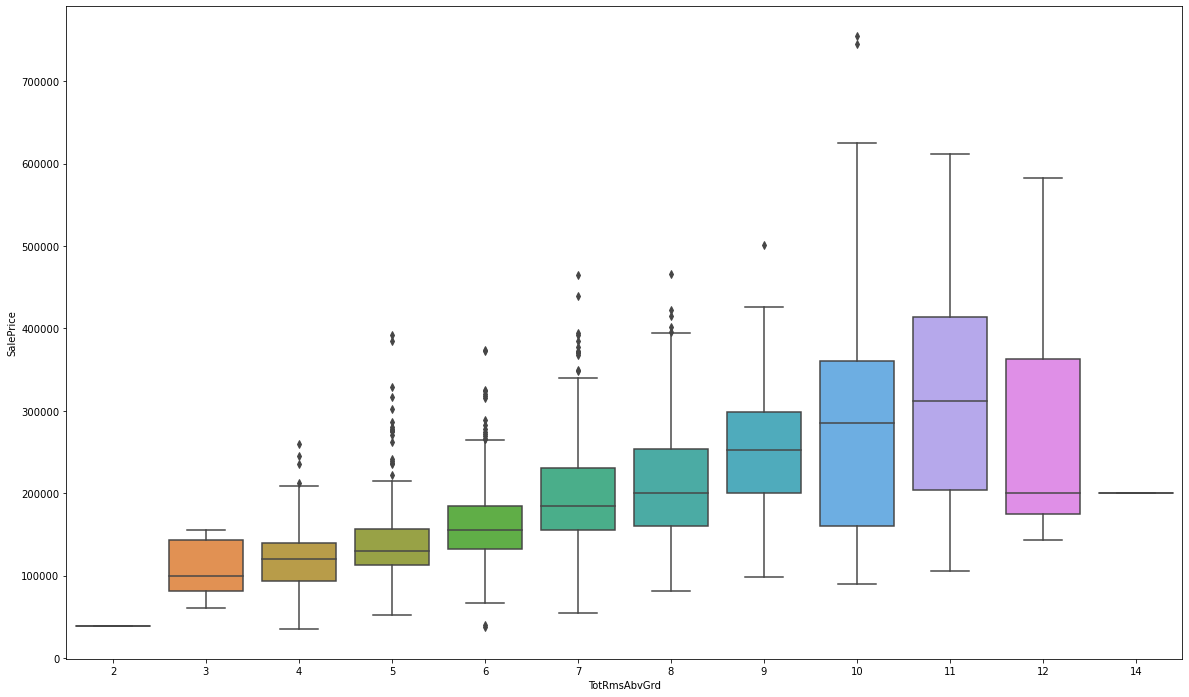

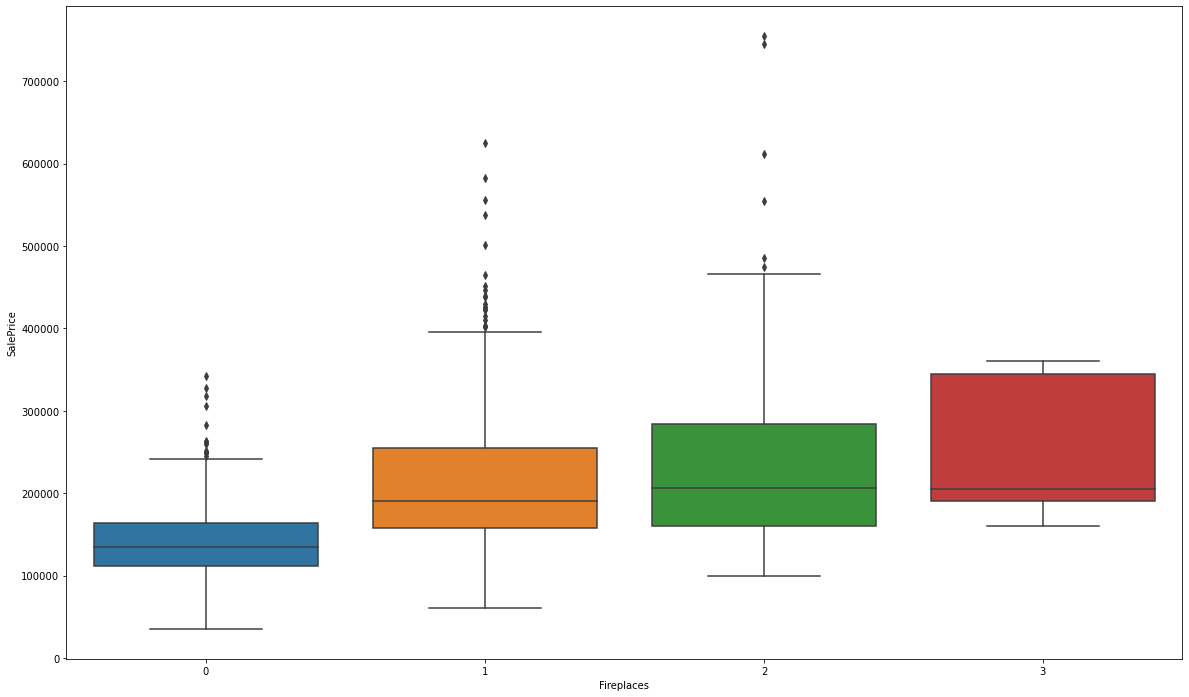

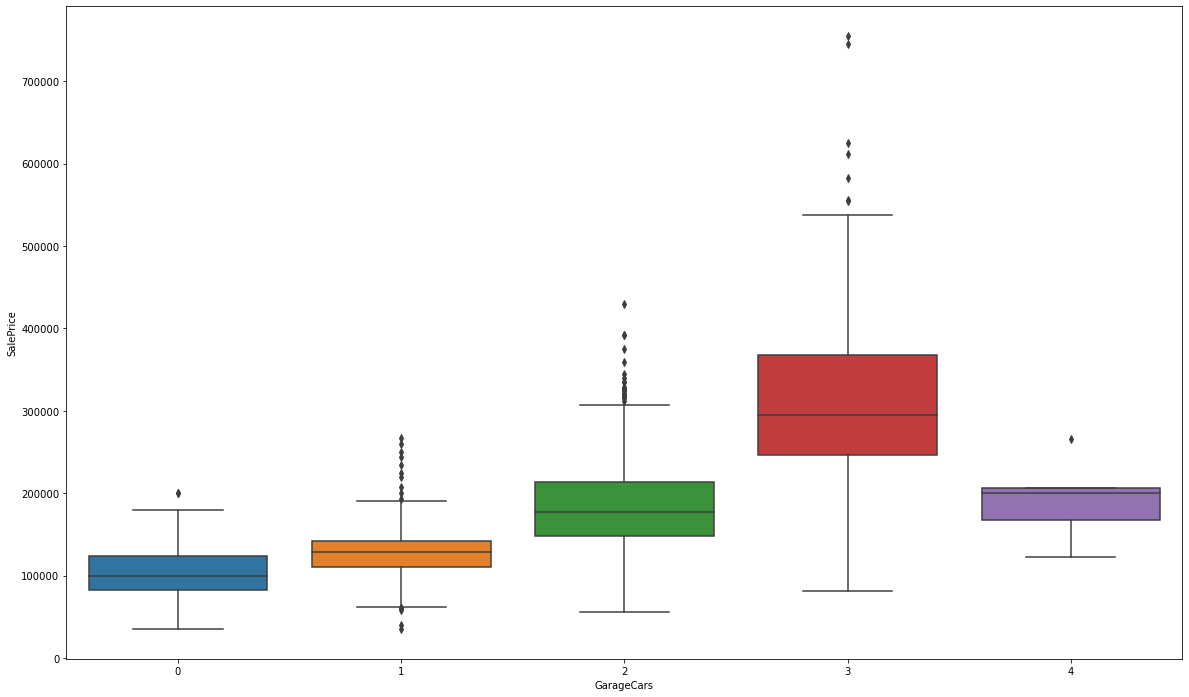

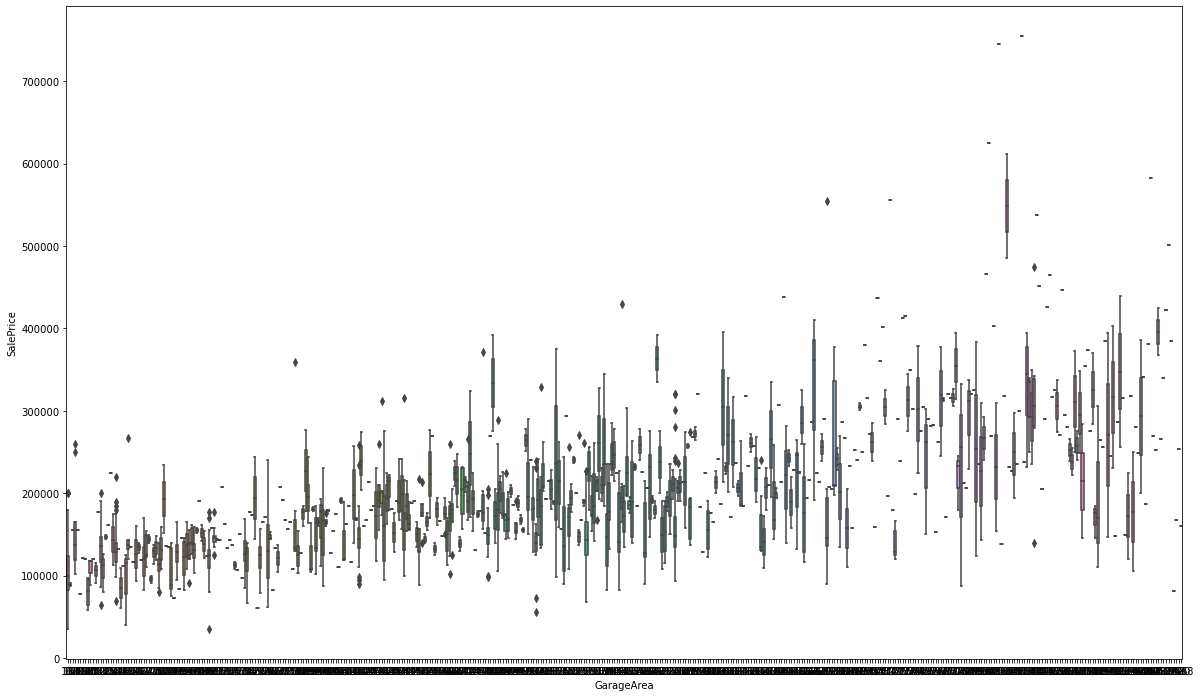

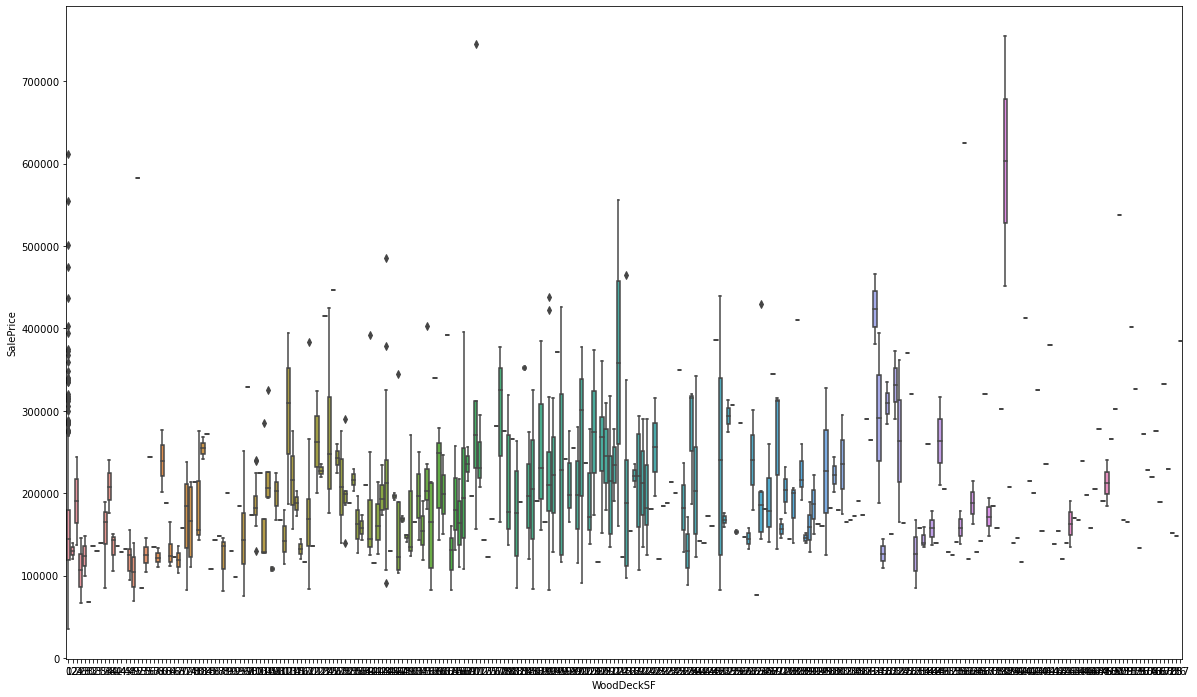

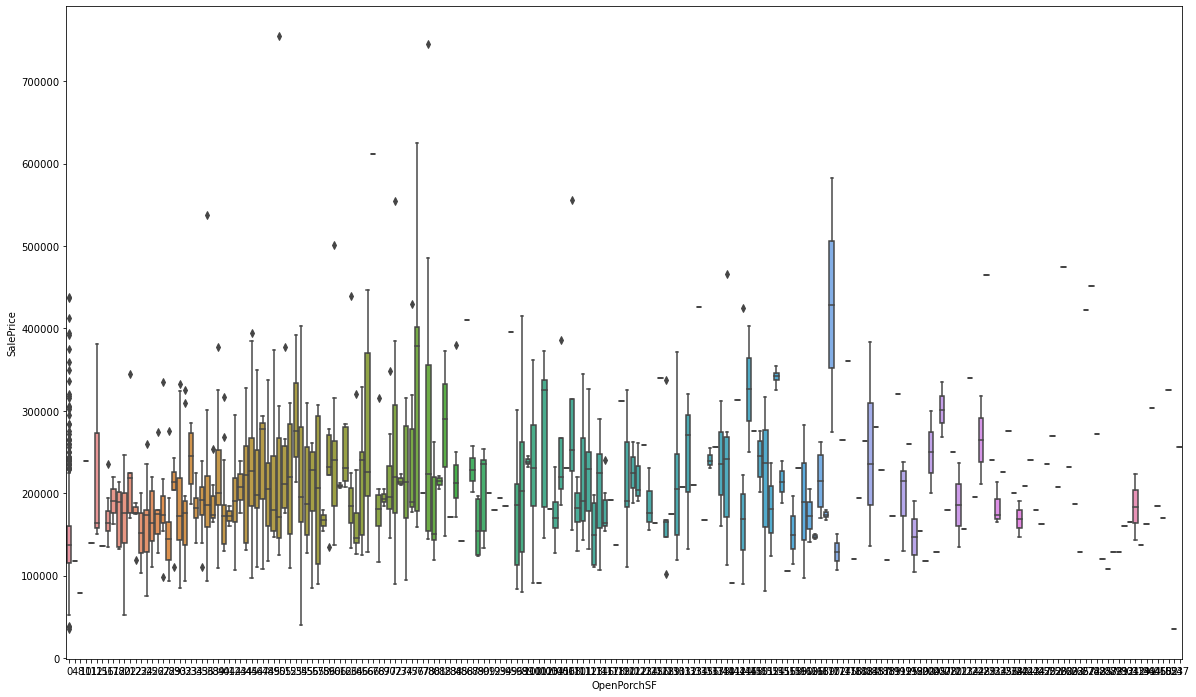

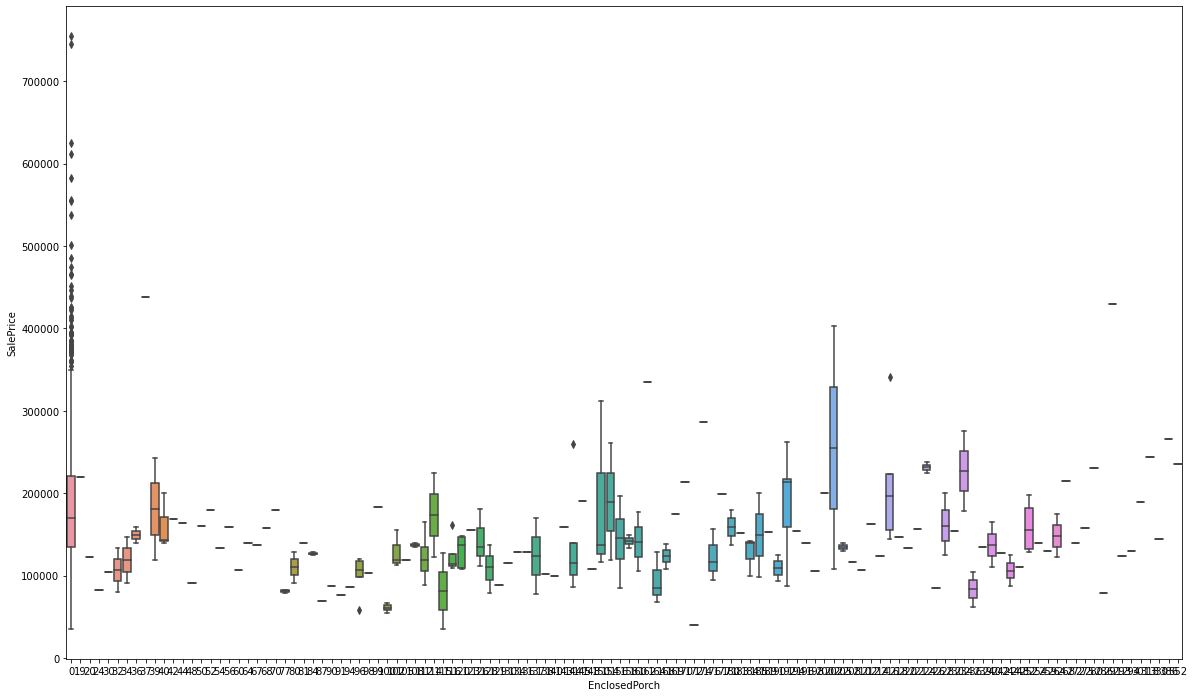

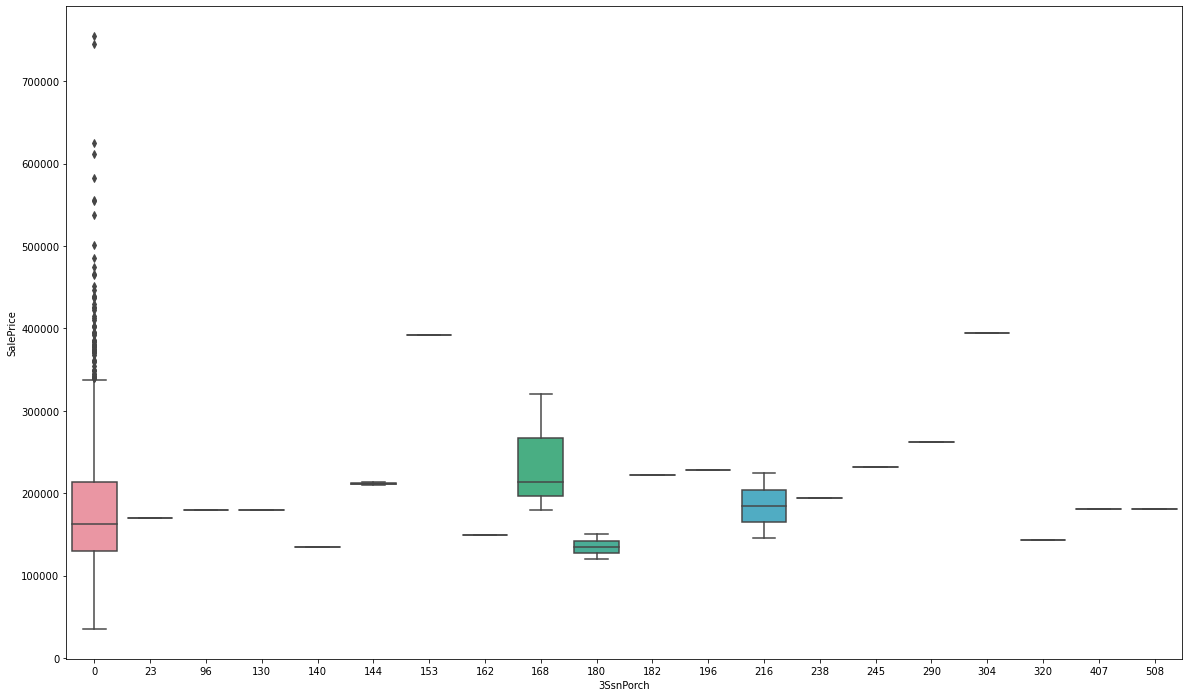

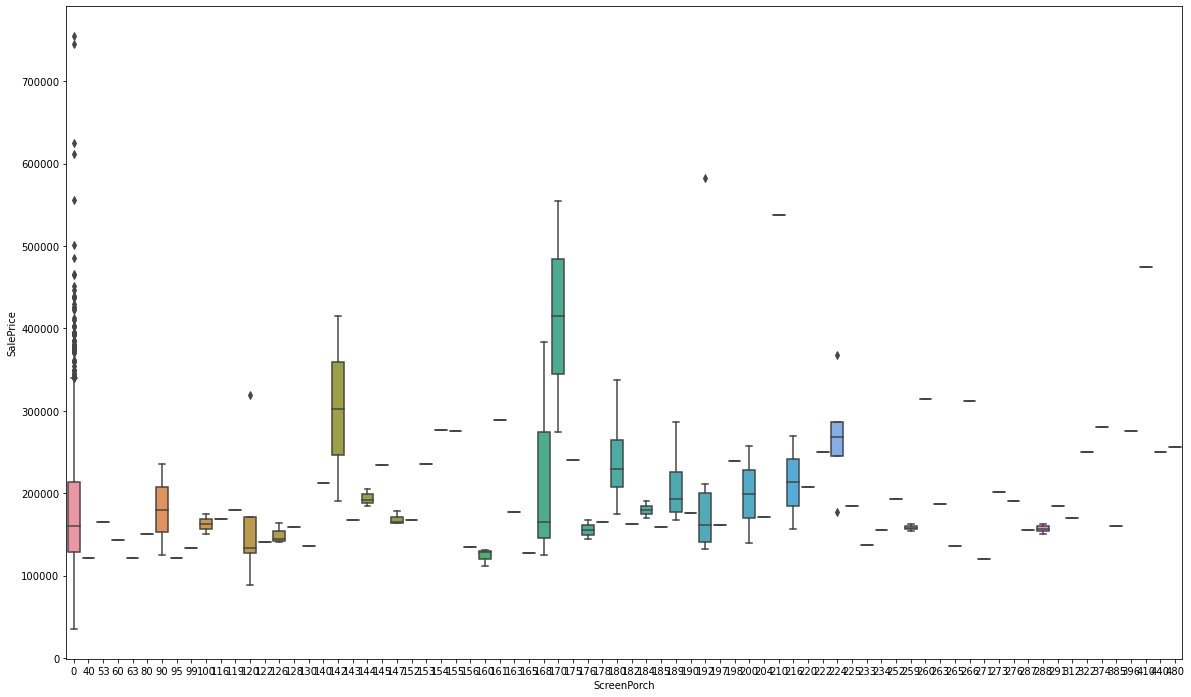

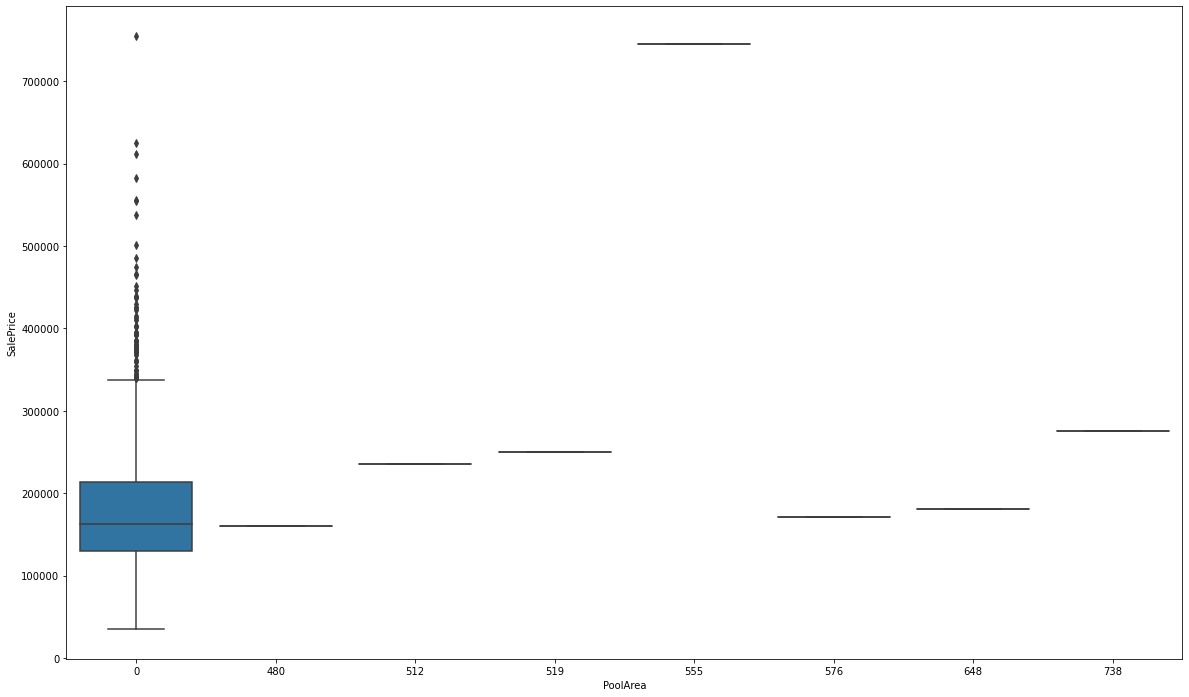

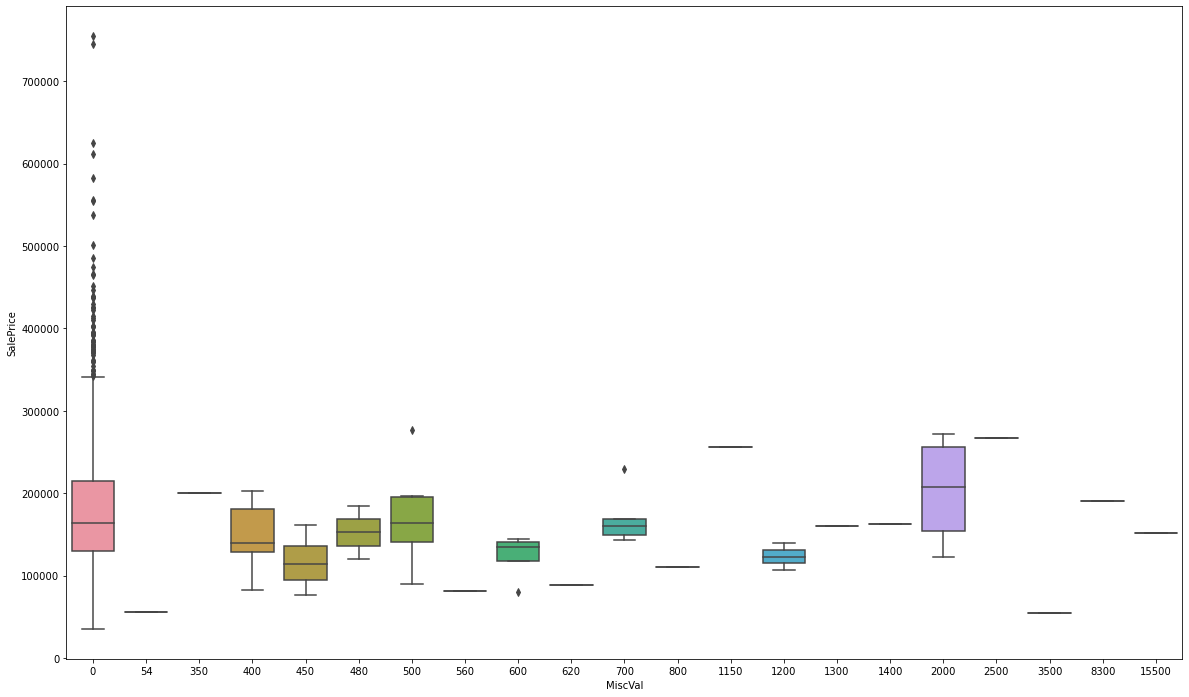

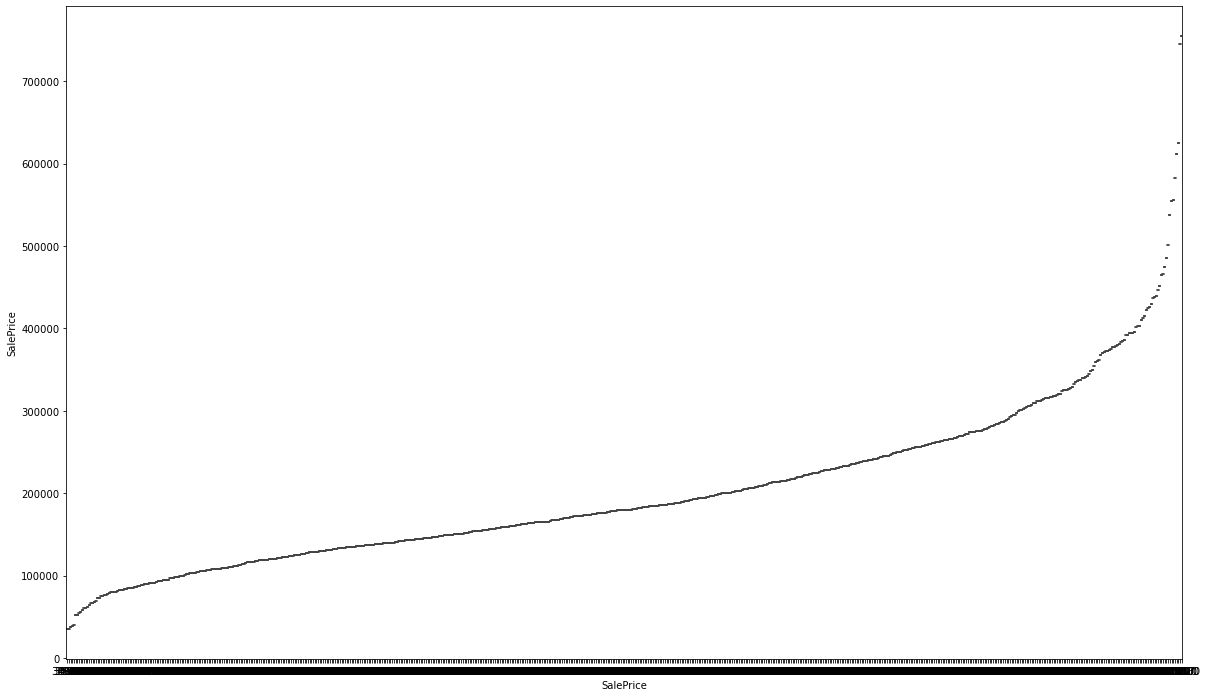

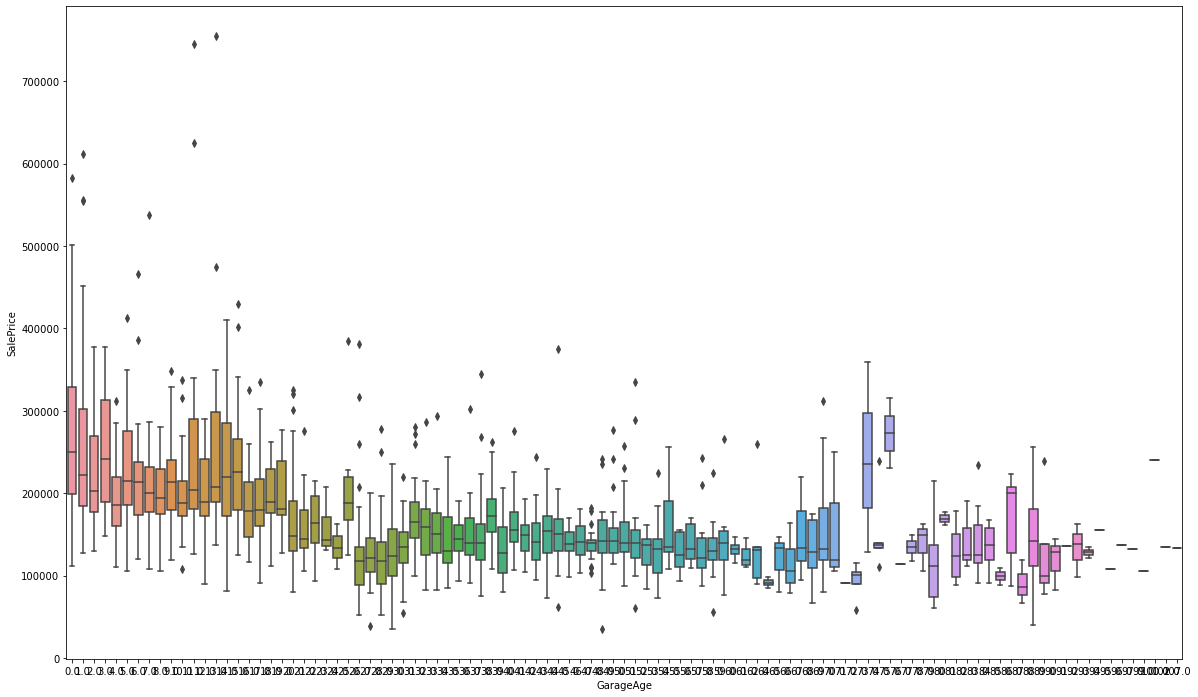

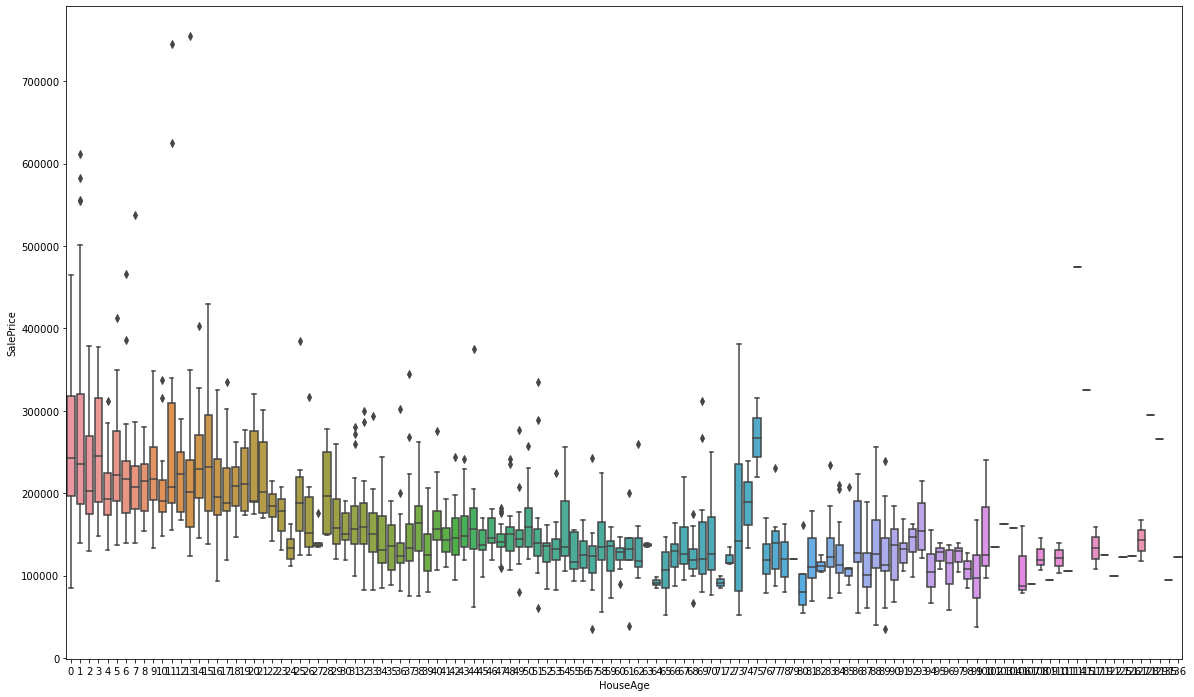

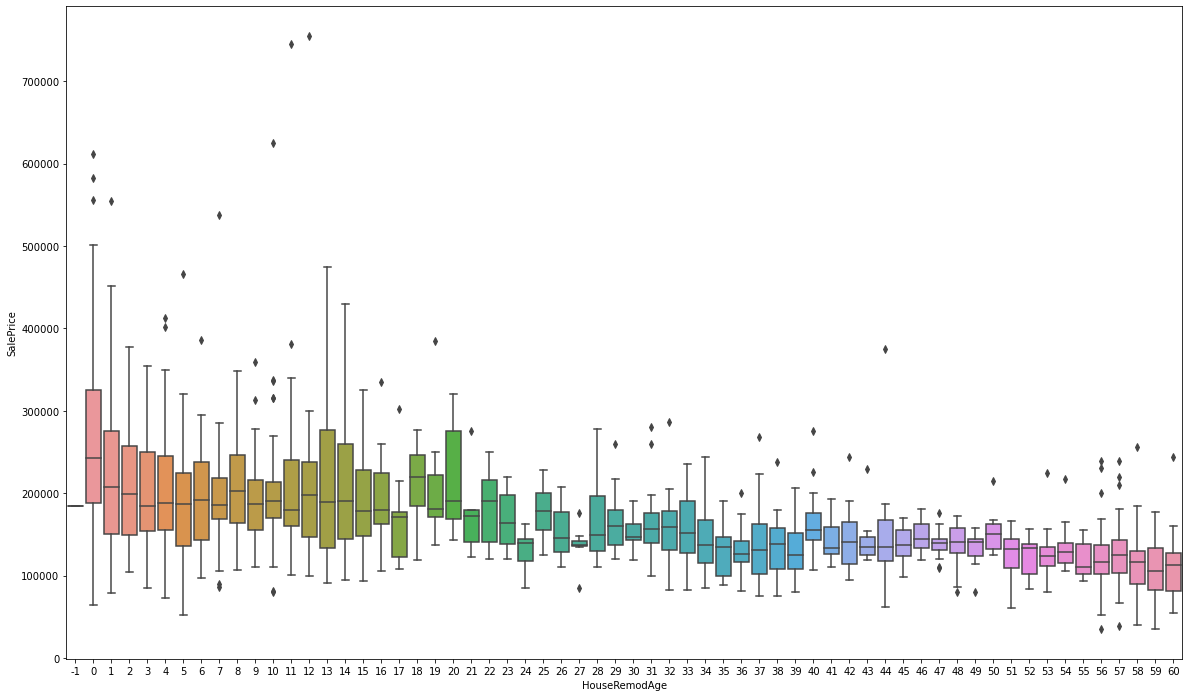

In [20]:
#visualize numerical variable  Box plot
length=1
for element in numeric_cols:
    plt.figure(figsize=(20, 12))
    sns.boxplot(x = element, y = 'SalePrice', data = data)
    plt.show()
    length=length+1

In [21]:
# correlation matrix
cor = data.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,GarageAge,HouseAge,HouseRemodAge
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,...,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771,-0.062544,-0.116223,-0.082957
LotArea,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,0.025036,-0.014832,-0.014709
MasVnrArea,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,...,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,-0.244519,-0.311479,-0.177105
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.147755,-0.248483,-0.127556
BsmtFinSF2,0.042463,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.089298,0.050422,0.069814
BsmtUnfSF,0.124098,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.187598,-0.150619,-0.183830
TotalBsmtSF,0.363472,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.309726,-0.391498,-0.292096
1stFlrSF,0.413773,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.225294,-0.282143,-0.241310
2ndFlrSF,0.072388,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334,-0.069919,-0.011552,-0.141903
LowQualFinSF,0.037469,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606,0.025455,0.182228,0.060573


<AxesSubplot:>

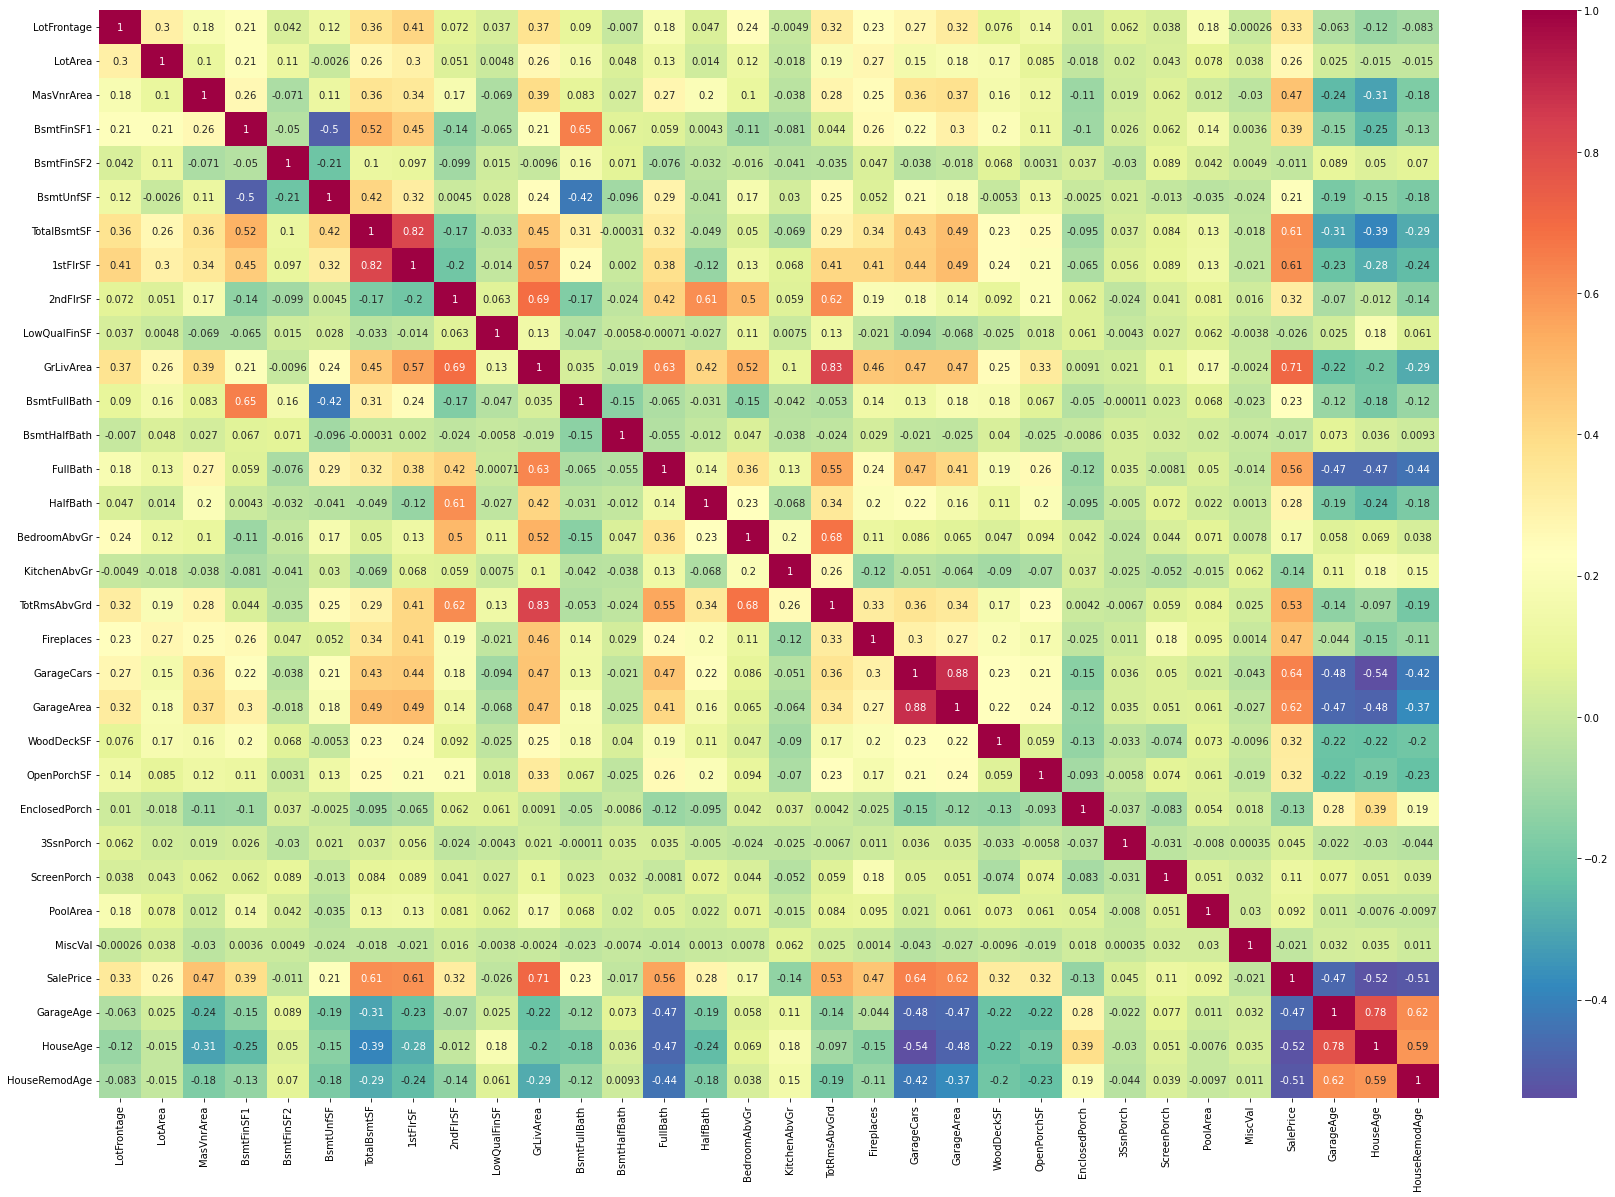

In [22]:
#lets check the corelation using heatmap
plt.figure(figsize=(30,20))
data_correlation = data.corr()
sns.heatmap(data_correlation,cmap="Spectral_r",annot=True)

In [23]:
# Since TotalBsmtSF and 1stFlrSF are higly corelated, we can drop one of them. Dropping 1stFlrSF variable
data = data.drop(columns=['1stFlrSF'])
#Dropping two of varibale from WooddeckSF, OpenPorchSF,2ndFlrSF as they are same corelated
data = data.drop(columns=['OpenPorchSF']) 
data=data.drop(columns=['2ndFlrSF'])

#drop these columns from numeric list as well

numeric_cols.remove('1stFlrSF')
numeric_cols.remove('OpenPorchSF')
numeric_cols.remove('2ndFlrSF')

In [24]:
#Creating categorical variables to Dummy variable

In [25]:
status = pd.get_dummies(data[catg_cols],drop_first = True)
data = pd.concat([data, status], axis = 1)
#Drop Categorical Variables
data.drop(catg_cols, axis = 1, inplace = True)


In [26]:
del data['BsmtQual_Gd']
del data['BsmtQual_TA']
del data['KitchenQual_TA']
del data['KitchenQual_Gd']
del data['HouseAge']

In [27]:
from sklearn.model_selection import train_test_split
y = data.pop('SalePrice')
X = data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [29]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

180527.34929809687
[-3.61386509e+03  4.46586978e+03  1.95852027e+03  1.22918932e+16
  4.51528065e+15  1.18599170e+16 -1.21339699e+16 -1.85791902e+03
  3.13459375e+04  4.85504688e+03  1.87450000e+03  4.20700000e+03
  2.78800000e+03 -2.49250000e+02 -4.40750000e+03  7.55000000e+02
  3.16050000e+03  1.04064375e+04 -4.33768750e+03  1.05375000e+03
  1.32901562e+03  2.47587500e+03  1.96775000e+03 -3.97500000e+02
  1.00000000e+01 -1.85000000e+02 -1.71562500e+03  6.31400000e+03
  5.06962500e+03  1.71637500e+04  1.49930000e+04  5.65250000e+02
 -1.18850000e+03  1.34275000e+03  4.33000000e+03  3.79000000e+03
  7.43700000e+03  2.18800000e+03 -2.15278125e+03 -6.72375000e+02
 -1.01642188e+03  1.47000000e+03 -8.81500000e+02 -4.26375000e+02
  5.42000000e+02 -5.03750000e+02  1.77800000e+03  1.62250000e+03
  5.20450000e+03 -4.82300000e+03  4.69000000e+02 -6.83000000e+02
 -9.44984375e+02 -7.58750000e+02 -1.45550000e+03  9.81750000e+02
 -3.69125000e+02  8.45262500e+03  1.06420938e+04 -1.66125000e+03
  5.56

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8979634129393628
-4.055561141277564e+22
651878508272.8811
1.1431461006520914e+35
637845898.5057545
2.6099226042285192e+32


In [33]:
### Ridge

In [34]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [36]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.08808960e+03  4.33308922e+03  2.39832987e+03 -9.13113505e+02
  6.67341697e+02 -5.28064317e+01 -7.28280898e+02 -1.73914317e+03
  2.50952884e+04  4.49433659e+03  1.47121157e+03  5.06390667e+03
  3.15073148e+03 -1.65823358e+02 -3.81550524e+03  2.55956671e+03
  3.84325528e+03  8.58345339e+03 -2.19265416e+03  1.28733409e+03
  9.50096509e+02  2.30691698e+03  1.78822976e+03 -3.77649493e+02
 -5.24625831e+01  1.47313108e+02 -2.39068674e+03  1.08441501e+03
  2.00603121e+03  5.58520715e+03  5.20725254e+03  5.51320216e+02
 -1.51051430e+03  1.10316897e+03  3.70064075e+03  3.06428811e+03
  6.43845303e+03  2.12760851e+03 -2.17402204e+03 -7.97441794e+02
 -1.11158248e+03  1.32579709e+03 -8.06672788e+02 -5.71338760e+02
 -2.88388107e+02 -1.20054920e+03  1.14139649e+03  3.51149607e+01
  4.56305003e+03 -5.60336241e+03 -5.51537327e+02 -2.16493781e+03
 -1.40667411e+03 -1.58839384e+03 -2.60225595e+03  6.87784370e+02
 -1.01476690e+03  8.09203168e+03  8.93481347e+03 -2.86677426e+03
  1.55030923e+02 -1.62919

In [37]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8965734120820148
0.8654968899679267
660758770848.1823
379125601618.4927
646535000.8299239
865583565.3390244


In [38]:
# Top 10 -Features
# Top 10 Features
coefs = pd.Series(ridge.coef_, index = X.columns)
coefs.sort_values().head(10)



Neighborhood_Edwards                                               -5603.362409
BsmtFinType1_Unf                                                   -3969.795410
KitchenAbvGr                                                       -3815.505245
BsmtExposure_No                                                    -3638.895087
OverallCond_Average                                                -3233.063956
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER   -3128.870941
LotFrontage                                                        -3088.089596
MSSubClass_2-STORY PUD - 1946 & NEWER                              -3072.641750
GarageFinish_Unf                                                   -3006.177354
Neighborhood_OldTown                                               -2866.774262
dtype: float64

###Lasso

In [39]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
print(model_cv.best_params_)

{'alpha': 20}


In [41]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised

alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=20)

In [42]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8978069565735068
0.8610377446383916
652878057016.3462
391694650433.5067
638823930.54437
894280023.8207916


In [43]:
# Top 10 Features
coefs = pd.Series(lasso.coef_, index = X.columns)
coefs.sort_values().head(10)

Neighborhood_Edwards                                               -4970.283334
BsmtFinType1_Unf                                                   -4397.512836
KitchenAbvGr                                                       -4361.579761
GarageArea                                                         -4206.821703
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER   -4153.119091
MSSubClass_2-STORY PUD - 1946 & NEWER                              -3961.859582
GarageQual_Fa                                                      -3827.924800
BsmtExposure_No                                                    -3547.618487
OverallCond_Average                                                -3468.528556
LotFrontage                                                        -3464.364832
dtype: float64

In [44]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.979634e-01,8.965734e-01,8.978070e-01
1,R2 Score (Test),-4.055561e+22,8.654969e-01,8.610377e-01
2,RSS (Train),6.518785e+11,6.607588e+11,6.528781e+11
3,RSS (Test),1.143146e+35,3.791256e+11,3.916947e+11
4,MSE (Train),2.525561e+04,2.542705e+04,2.527497e+04
5,MSE (Test),1.615525e+16,2.942080e+04,2.990452e+04


In [45]:
betas = pd.DataFrame(index=X.columns)

In [46]:
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [47]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,-3.613865e+03,-3088.089596,-3464.364832
LotArea,4.465870e+03,4333.089225,4423.397086
MasVnrArea,1.958520e+03,2398.329869,1909.829513
BsmtFinSF1,1.229189e+16,-913.113505,-1228.380998
BsmtFinSF2,4.515281e+15,667.341697,438.025573
BsmtUnfSF,1.185992e+16,-52.806432,-0.000000
TotalBsmtSF,-1.213397e+16,-728.280898,-2935.441439
LowQualFinSF,-1.857919e+03,-1739.143174,-1786.991482
GrLivArea,3.134594e+04,25095.288418,30990.588157
BsmtFullBath,4.855047e+03,4494.336586,4760.507663
